In [401]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import re
from langdetect import detect
from datetime import datetime

In [402]:
# import sklearn modules
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.linear_model import Ridge, LogisticRegression, Lasso,ElasticNet
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [403]:
# import scipy modules
from scipy.stats import randint
from scipy.stats import uniform
import joblib
from IPython.display import SVG

In [404]:
# utils function
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
def save_model(model, name):
    fp = './models/'+name+'.pkl'
    joblib.dump(model, fp)

In [405]:
# import gradient boosting models
import lightgbm
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [255]:
# H2O automl
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_201"; Java(TM) SE Runtime Environment (build 1.8.0_201-b09); Java HotSpot(TM) 64-Bit Server VM (build 25.201-b09, mixed mode)
  Starting server from /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/kk/5t867d615mxd22hwz9rjn9mm0000gn/T/tmpr80_h5ho
  JVM stdout: /var/folders/kk/5t867d615mxd22hwz9rjn9mm0000gn/T/tmpr80_h5ho/h2o_kailing_started_from_python.out
  JVM stderr: /var/folders/kk/5t867d615mxd22hwz9rjn9mm0000gn/T/tmpr80_h5ho/h2o_kailing_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/Los_Angeles
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.3
H2O_cluster_version_age:,2 days
H2O_cluster_name:,H2O_from_python_kailing_raid7k
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.778 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"accepting new members, healthy"


In [406]:
# neural nets
from keras import models, layers, optimizers, regularizers, Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.utils.vis_utils import model_to_dot
from livelossplot.keras import PlotLossesCallback

In [647]:
# import data
_date_cols = ['host_since', 'first_review', 'last_review']
df = pd.read_csv('./data/train.csv', low_memory=False, parse_dates=_date_cols)
test_df = pd.read_csv('./data/test.csv', low_memory=False, parse_dates=_date_cols)
df.head()

,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,22267382,Modern and Cozy Large Studio in Brooklyn,Modern large studio with new amenities and app...,Our place is a little quiet sanctuary in the h...,Modern large studio with new amenities and app...,none,"BAM, Barclays, Brooklyn City Point, Fort Green...",NaN,"Subway: 2,3,4,5,A,C,B,Q,G",Washer/Dryer Dishwasher Internet Gym Roof Top ...,...,10.0,10.0,10.0,t,f,flexible,f,f,1,0.59
1,2473861,Royal Harlem TRIPLEX Home 5 Beds,Harlem is back and so gorgeous! Visit and expl...,Harlem is back and so gorgeous! Visit and expl...,Harlem is back and so gorgeous! Visit and expl...,none,HARLEM is a piece of real NY history overflowi...,HARLEM RESTAURANTS Red Rooster Harlem -- excel...,PUBLIC TRANSPORTATION: Conveniently near all p...,The WHOLE ENTIRE HOUSE,...,9.0,9.0,9.0,t,f,moderate,f,f,3,2.47
2,25079703,Sunny East Village Studio,"Clean, hip and well designed sun drenched East...",This is a rare East Village studio with it's h...,"Clean, hip and well designed sun drenched East...",none,East Village is one of the last remaining neig...,NaN,NaN,You'll have access to the entire space - it's ...,...,10.0,10.0,10.0,f,f,moderate,f,f,1,0.89
3,9342478,"Beautiful, airy, light-filled room","Private, spacious, comfortable room in 2-bed f...","Big closet, two big windows, tall ceiling and ...","Private, spacious, comfortable room in 2-bed f...",none,One block from Morgan L stop. Super cool area....,NaN,NaN,NaN,...,NaN,NaN,NaN,f,f,flexible,f,f,1,NaN
4,4866426,Private Room in Prime Brooklyn Spot,"Comfy, quiet and big private room in a three b...",This big old apartment that we love and take c...,"Comfy, quiet and big private room in a three b...",none,I absolutely love this neighborhood - right at...,Just a note about the space: The window in you...,Super convenient to almost all subway lines. A...,Your room has a very comfortable queen sized b...,...,10.0,10.0,10.0,f,f,flexible,f,f,1,3.14


In [648]:
def pre_drop_cols(df):
    useless_col = [
        'experiences_offered', 'host_acceptance_rate',
        'is_business_travel_ready', "square_feet", 'country_code'
    ]
    unique_id = ['id', 'host_id', 'name', 'host_name']
    df.drop(useless_col + unique_id, axis=1, inplace=True)
    
    return df

df = pre_drop_cols(df)
test_df = pre_drop_cols(test_df)

In [409]:
df.corr()['price']

host_listings_count               0.066808
accommodates                      0.513268
bathrooms                         0.293762
bedrooms                          0.381478
beds                              0.408146
price                             1.000000
guests_included                   0.302961
minimum_nights                    0.019503
maximum_nights                   -0.000608
number_of_reviews                -0.032250
review_scores_rating              0.049288
review_scores_accuracy            0.006649
review_scores_cleanliness         0.061048
review_scores_checkin            -0.006680
review_scores_communication       0.001658
review_scores_location            0.146426
review_scores_value              -0.031823
calculated_host_listings_count    0.078186
reviews_per_month                -0.023037
latitude                          0.050422
longitude                        -0.230645
Name: price, dtype: float64

# EDA

## feature type

In [55]:

# for col in df.columns:
#     col_type = df[col].dtypes

#     if col_type == int or col_type == float:
#         numerics.append(col)
#     else:
#         _num_unique = df[col].nunique()
#         if _num_unique <= 2000:
#             categorical.append(col)
#         else:
#             text.append(col)

In [41]:
# temp_combined = pd.concat([df[cate_cols], test_df[cate_cols]])
# temp_combined = temp_combined.apply(lambda x: x.fillna(x.value_counts()[0]))
# # one_hot = OneHotEncoder()
# # one_hot.fit(temp_combined)
# temp_combined.columns

### categorical cols cleaning

In [649]:
DF_LEN = 33538
TESTDF_LEN = 17337
# combine df and test_df for feature engineering
def combine_df(df, test_df):
    entire_df = pd.concat([df, test_df], ignore_index=True)
    return entire_df

def split(entire_df):
    df = entire_df.iloc[:DF_LEN].copy()
    test_df = entire_df.iloc[DF_LEN:].copy()
    test_df.drop('price', axis=1, inplace=True)
    return df, test_df

entire_df = combine_df(df, test_df)

In [650]:
def clean_extra_people(df):
    df['extra_people'] = df['extra_people'].str.lstrip('$').astype(float)
    return df

entire_df = clean_extra_people(entire_df)


# # replace property_type value_counts <= 10 to 'Other'
# def replace_property_type(df):
#     s = df['property_type'].value_counts()
#     df['property_type'] = np.where(df['property_type'].isin(s.index[s > 5]),
#                                    df['property_type'], 'Other')
#     return df


# df = replace_property_type(df)
# test_df = replace_property_type(test_df)


# replace host_neighbourhood value_counts <= 1 to 'Other'
def replace_host_neighbourhood(df):
    s = df['host_neighbourhood'].value_counts()
    df['host_neighbourhood'] = np.where(
        df['host_neighbourhood'].isin(s.index[s > 1]),
        df['host_neighbourhood'], 'Other')
    return df


entire_df = replace_host_neighbourhood(entire_df)

In [419]:
entire_df['require_guest_phone_verification'].value_counts()

f    49524
t     1351
Name: require_guest_phone_verification, dtype: int64

## a quick model

In [12]:
# drop text + datetimelike columns and columns that has over 500 null values
# def quick_drop(df):
#     # drop text andd datetimelike columns
#     df_copy = df.copy()
#     df_copy.drop(text+datetimelike, axis=1, inplace=True)
    
#     # drop cols that has more than 500 null values
#     null_cols = []
#     for col in df_copy.columns:
#         if df_copy[col].isnull().sum() > 500:
#             df_copy.drop(col, axis=1, inplace=True)
#         elif col in numerics:
#             # fill null values with mean
#             df_copy[col].fillna(df_copy[col].mean())
        
#     df_copy.dropna(inplace=True)
#     return df_copy

In [226]:
# quick_cleaned_df = quick_drop(df)

In [55]:
# # quick feature transformation
# def quick_feature_transformation(df):
#     for col in df.columns:
#         if col in categorical:
#             _onehot_df = pd.get_dummies(df[[col]],prefix=col)
#             df = pd.concat([df, _onehot_df], axis=1)
#             df.drop(col, axis=1, inplace=True)
#     return df
# quick_cleaned_df = quick_feature_transformation(quick_cleaned_df)

In [88]:
# # quick train val split
# quick_X = quick_cleaned_df.drop('price', axis=1).copy()
# quick_y = quick_cleaned_df['price']

# def is_ascii(s):
#     return all(ord(c) < 128 for c in s)

# for col in quick_cleaned_df.columns:
#     if not is_ascii(col):
#         quick_cleaned_df.drop(col, axis=1, inplace=True)

# quick_X_train, quick_X_test, quick_y_train, quick_y_test = train_test_split(
#     quick_X, quick_y, test_size=0.3, random_state=42)

In [59]:
# # build a quick RandomForest
# def quick_rf_reg(X_train, y_train):
#     rf_reg = RandomForestRegressor(verbose=1)

#     params = {
#         'n_estimators': np.arange(100, 500),
#         'max_depth': np.arange(3, 8),
#         'min_samples_split': np.arange(3, 10),
#         'min_samples_leaf': np.arange(3, 10),
#         'max_features': ['auto', None],
#         'warm_start': [True, False],
#         'bootstrap': [True, False]
#     }

#     reg = RandomizedSearchCV(rf_reg,
#                              params,
#                              scoring='neg_root_mean_squared_error',
#                              n_jobs=-1,
#                              verbose=2,
#                              random_state=42)
    
#     # train 
#     reg.fit(X_train, y_train)
    
#     return reg

In [60]:
# quick_rf_randomCV = quick_rf_reg(quick_X_train, quick_y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 35.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 56.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 790


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


building tree 2 of 790
building tree 3 of 790
building tree 4 of 790
building tree 5 of 790
building tree 6 of 790
building tree 7 of 790
building tree 8 of 790
building tree 9 of 790
building tree 10 of 790
building tree 11 of 790
building tree 12 of 790
building tree 13 of 790
building tree 14 of 790
building tree 15 of 790
building tree 16 of 790
building tree 17 of 790
building tree 18 of 790
building tree 19 of 790
building tree 20 of 790
building tree 21 of 790
building tree 22 of 790
building tree 23 of 790
building tree 24 of 790
building tree 25 of 790
building tree 26 of 790
building tree 27 of 790
building tree 28 of 790
building tree 29 of 790
building tree 30 of 790
building tree 31 of 790
building tree 32 of 790
building tree 33 of 790
building tree 34 of 790
building tree 35 of 790
building tree 36 of 790
building tree 37 of 790
building tree 38 of 790
building tree 39 of 790
building tree 40 of 790
building tree 41 of 790
building tree 42 of 790
building tree 43 of 790


building tree 334 of 790
building tree 335 of 790
building tree 336 of 790
building tree 337 of 790
building tree 338 of 790
building tree 339 of 790
building tree 340 of 790
building tree 341 of 790
building tree 342 of 790
building tree 343 of 790
building tree 344 of 790
building tree 345 of 790
building tree 346 of 790
building tree 347 of 790
building tree 348 of 790
building tree 349 of 790
building tree 350 of 790
building tree 351 of 790
building tree 352 of 790
building tree 353 of 790
building tree 354 of 790
building tree 355 of 790
building tree 356 of 790
building tree 357 of 790
building tree 358 of 790
building tree 359 of 790
building tree 360 of 790
building tree 361 of 790
building tree 362 of 790
building tree 363 of 790
building tree 364 of 790
building tree 365 of 790
building tree 366 of 790
building tree 367 of 790
building tree 368 of 790
building tree 369 of 790
building tree 370 of 790
building tree 371 of 790
building tree 372 of 790
building tree 373 of 790


building tree 662 of 790
building tree 663 of 790
building tree 664 of 790
building tree 665 of 790
building tree 666 of 790
building tree 667 of 790
building tree 668 of 790
building tree 669 of 790
building tree 670 of 790
building tree 671 of 790
building tree 672 of 790
building tree 673 of 790
building tree 674 of 790
building tree 675 of 790
building tree 676 of 790
building tree 677 of 790
building tree 678 of 790
building tree 679 of 790
building tree 680 of 790
building tree 681 of 790
building tree 682 of 790
building tree 683 of 790
building tree 684 of 790
building tree 685 of 790
building tree 686 of 790
building tree 687 of 790
building tree 688 of 790
building tree 689 of 790
building tree 690 of 790
building tree 691 of 790
building tree 692 of 790
building tree 693 of 790
building tree 694 of 790
building tree 695 of 790
building tree 696 of 790
building tree 697 of 790
building tree 698 of 790
building tree 699 of 790
building tree 700 of 790
building tree 701 of 790


[Parallel(n_jobs=1)]: Done 790 out of 790 | elapsed:  7.1min finished


In [62]:
# quick_rf_randomCV.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=3, min_weight_fraction_leaf=0.0,
                      n_estimators=790, n_jobs=None, oob_score=False,
                      random_state=None, verbose=2, warm_start=True)

In [74]:
# quick_y_pred = quick_rf_randomCV.predict(quick_X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 790 out of 790 | elapsed:    0.3s finished


In [75]:
# rmse(quick_y_test, quick_y_pred)

92.92274059385808

In [98]:
# # lightbgm quick train
# lgbm = LGBMRegressor(max_depth=6, min_child_samples=4, n_estimators=700)   
# quick_X_train.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in quick_X_train.columns]
# quick_X_test.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in quick_X_test.columns]
# lgbm.fit(quick_X_train, quick_y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=6,
              min_child_samples=4, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=700, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [99]:
# quick_y_pred = lgbm.predict(quick_X_test)
# rmse(quick_y_test, quick_y_pred)

89.82753925687697

## Data Analysis

### check shape

In [413]:
df.shape, test_df.shape, entire_df.shape

((33538, 58), (17337, 57), (50875, 58))

### Numeric Analysis

In [619]:
# highly corelated cols
high_corr = [
    ['host_listings_count', 'calculated_host_listings_count'],
    [
        'review_scores_rating', 'review_scores_accuracy',
        'review_scores_cleanliness', 'review_scores_communication',
        'review_scores_communication', 'review_scores_value'
    ], ['host_response_time', 'host_response_rate'],
    ['neighbourhood_group_cleansed', 'neighbourhood_cleansed', 'zipcode'],
    ['require_guest_phone_verification', 'require_guest_profile_picture']
]

num_cols = [
    'calculated_host_listings_count', 'accommodates', 'bathrooms', 'bedrooms',
    'beds', 'guests_included', 'minimum_nights', 'number_of_reviews',
    'review_scores_rating', 'review_scores_cleanliness',
    'review_scores_location', 'extra_people',
]

cate_cols = [
    'host_is_superhost', 'property_type', 'room_type', 'bed_type',
    'neighbourhood_group_cleansed', 'transit','host_identity_verified', 
]

drop_obj_cols = ['host_location']

drop_cate_cols = [
    'city', 'state', 'country', 'market', 'maximum_nights',
    'review_scores_accuracy', 'review_scores_communication',
    'review_scores_checkin', 'host_neighbourhood', 'review_scores_value',
    'host_has_profile_pic', 'require_guest_phone_verification',
    'host_location', 'neighbourhood_cleansed','instant_bookable'
]

list_cols = ['amenities', 'host_verifications']

date_cols = ['host_since', 'first_review', 'last_review']

text_cols = [
    'summary', 'space', 'description', 'neighborhood_overview', 'notes',
    'transit', 'access', 'interaction', 'house_rules', 'host_about'
]
label = ['price']

In [620]:
def featengi_bycol(df, colname, feat_lst): 
    gourp_cols = num_cols + [colname]
    
    if 'mean' in feat_lst:
        temp_mean = df[gourp_cols].groupby([colname]).transform(lambda x: x.mean())
        temp_mean = temp_mean.add_prefix(colname[:5]+'_mean_')
        df = pd.concat([df, temp_mean], axis=1)
        num_cols.extend(temp_mean.columns.values.tolist())
    if 'std' in feat_lst:
        temp_std = df[gourp_cols].groupby([colname]).transform(lambda x: x.std())
        temp_std = temp_std.add_prefix(colname[:5] + '_std_')
        df = pd.concat([df, temp_std], axis=1)
        num_cols.extend(temp_std.columns.values.tolist())
    if 'max' in feat_lst:
        temp_max = df[gourp_cols].groupby([colname]).transform(lambda x: x.max())
        temp_max = temp_max.add_prefix(colname[:5] + '_max_')
        df = pd.concat([df, temp_max], axis=1)
        num_cols.extend(temp_max.columns.values.tolist())
    if 'min' in feat_lst:
        temp_min = df[gourp_cols].groupby([colname]).transform(lambda x: x.min())
        temp_min = temp_min.add_prefix(colname[:5] + '_min_')
        df = pd.concat([df, temp_min], axis=1)
        num_cols.extend(temp_min.columns.values.tolist())
    if 'median' in feat_lst:
        temp_median = df[gourp_cols].groupby([colname]).transform(lambda x: x.median())
        temp_median = temp_median.add_prefix(colname[:5] + '_median_')
        df = pd.concat([df, temp_median], axis=1)
        num_cols.extend(temp_median.columns.values.tolist())
    return df

#entire_df = featengi_bycol(entire_df, 'neighbourhood_group_cleansed', ['mean','max','std'])
entire_df = featengi_bycol(entire_df, 'neighbourhood_cleansed', ['mean','max'])
# entire_df = featengi_bycol(entire_df, 'room_type')
# entire_df = featengi_bycol(entire_df, 'property_type')


In [621]:
def calculated_features(df):
    # compute host_about length 
    # df['host_about_len'] = df['host_about'].str.len()
    # df['host_about_len'] = df['host_about_len'].fillna(df['host_about_len'].mean())
    # df['description_len'] = df['description'].str.len()
    
    # number of accommdates per beds
    df['accom_per_beds'] = df['accommodates'] / df['beds']
    df['accom_per_beds'] = df['accom_per_beds'].apply(lambda x: 4 if x == float('inf') else x)
    # number of accommdates per bath
    df['accom_per_bath'] = df['accommodates'] / df['bathrooms']
    df['accom_per_bath'] = df['accom_per_bath'].apply(lambda x: 4 if x == float('inf') else x)
    # number of beds per bedroom
#     df['bed_per_bedrooms'] = df['beds'] / df['bedrooms']
#     df['bed_per_bedrooms'] = df['bed_per_bedrooms'].apply(lambda x: 0 if x == float('inf') else x)
    
    
    # host location 1 if local else 0
    df['host_location'] = df['host_location'].str.contains('NY|New York|纽约|Brooklyn|Manhattan').astype('str')
    df['transit'] = df['transit'].str.contains('Subway|Train|train|subway|Buses|buses').astype('str')
    
#     if 'host_about_len' not in num_cols:
#         num_cols.append('host_about_len')
    if 'accom_per_beds' not in num_cols:
        num_cols.append('accom_per_beds')
#     if 'description_len' not in num_cols:
#         num_cols.append('description_len')
    if 'accom_per_bath' not in num_cols:
        num_cols.append('accom_per_bath')
#     if 'bed_per_bedrooms' not in num_cols:
#         num_cols.append('bed_per_bedrooms')
    
    df['accom_per_beds_ratio'] = df['accom_per_beds'].apply(lambda x: '1' if x <= 1. else '0')
    if 'accom_per_beds_ratio' not in cate_cols:
        cate_cols.append('accom_per_beds_ratio')
        
    bath_per_bed = df['bathrooms'] / df['beds']
    df['bath_per_bed'] = bath_per_bed.apply(lambda x: '1' if x >= 1. else '0')
    if 'bath_per_bed' not in cate_cols:
        cate_cols.append('bath_per_bed')
    
    # extra people
    df['extrra_ppl'] = df['accommodates'] - df['guests_included']
    if 'extrra_ppl' not in num_cols:
        num_cols.append('extrra_ppl')
    
    # night duration
    df['nights_duration'] = df['maximum_nights'] - df['minimum_nights']
    if 'nights_duration' not in num_cols:
        num_cols.append('nights_duration')
    
    return df
entire_df = calculated_features(entire_df)

In [622]:
def fill_null(df):
    # fill number of review 0
    df['number_of_reviews'] = df['number_of_reviews'].fillna(0)
    return df
entire_df = fill_null(entire_df)

In [623]:
# fill with mean grouoby neighbourhood_group_cleansed
entire_df[num_cols] = entire_df[num_cols].fillna(
    entire_df[num_cols + ['neighbourhood_group_cleansed']].groupby(
        ['neighbourhood_group_cleansed'])[num_cols].transform('mean'))

### timestamp

In [624]:
# fill na in date cols
def fillna_datetime(df):
    temp = df.copy()
    for col in date_cols:
        '''
        missing_date = list(temp[temp[col].isnull()].index)
        mean_date = temp[col].drop(missing_date)
        temp.loc[missing_date, col] = (mean_date - mean_date.min()).mean() + mean_date.min()
        '''
        df[col] = df[col].fillna(min(df[col]))

    return temp

entire_df = fillna_datetime(entire_df)

def review_diff(df):
    df['review_diff'] = (df['last_review'] - df['first_review']).apply(lambda x: x.days)
    df['host_duration'] = (df['last_review'] - df['host_since']).apply(lambda x: x.days)
    if 'review_diff' not in date_cols:
        date_cols.extend(['review_diff', 'host_duration'])
    return df

#entire_df = review_diff(entire_df)

### cate analysis

In [625]:
def host_verification(cols):
    possible_words = {}
    i = 0
    for col in cols:
        words = col.split()
        for w in words:
            wr = re.sub(r'\W+', '', w)
            if wr != '' and wr not in possible_words:
                possible_words[wr] = i
                i += 1
    l = len(possible_words)

    new_cols = np.zeros((cols.shape[0], l))
    for i, col in enumerate(cols):
        words = col.split()
        arr = np.zeros(l)
        for w in words:
            wr = re.sub(r'\W+', '', w)
            if wr != '':
                arr[possible_words[wr]] = 1
        new_cols[i] = arr
    return list(possible_words.keys()), new_cols
host_veri_keys, host_veri = host_verification(df['host_verifications'])

In [626]:
def amenities(cols):
    dic = {}
    i = 0
    len_ameni = []
    for col in cols:
        arr = col.split(',')
        cnt = 0
        for a in arr:
            ar = re.sub(r'\W+', '', a)
            if len(ar) > 0:
                cnt += 1
                if ar not in dic:
                    dic[ar] = i
                    i += 1
        len_ameni.append(cnt)
    l = len(dic)
    new_cols = np.zeros((cols.shape[0], l))
    for i, col in enumerate(cols):
        words = col.split(',')
        arr = np.zeros(l)
        for w in words:
            wr = re.sub(r'\W+', '', w)
            if wr != '':
                arr[dic[wr]] = 1
        new_cols[i] = arr
    return list(dic.keys()), new_cols, len_ameni
ameni_keys, ameni, len_ameni = amenities(df['amenities'])

In [627]:
class ListTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, col_names=None):
        self.col_names = col_names
        self.useful_cols = [
            'Airconditioning', 'Gym', 'Elevator', 'Washer', 'Dryer',
            'Buildingstaff', 'TV', 'Paidparkingoffpremises',
            'Familykidfriendly', 'Dishwasher', 'CableTV', 'Doorman', 'Crib',
            'PacknPlaytravelcrib', 'Indoorfireplace'
        ]
        self.host_cols = [
            'email', 'phone', 'reviews', 'jumio', 'government_id',
            'manual_offline', 'facebook', 'kba', 'offline_government_id',
            'sent_id', 'selfie', 'identity_manual', 'work_email', 'google',
            'manual_online', 'sesame', 'weibo', 'None'
        ]

    def fit(self, X, y=None):
        self.X_copy = X.copy()
        if 'amenities' not in self.X_copy.columns:
            raise "Amenities is not in the dataset"
        else:
            ameni_keys, ameni, len_ameni = amenities(self.X_copy['amenities'])
            self.ameni_keys = ameni_keys
            ameni = ameni.T
            for ix, key in enumerate(ameni_keys):
                if key in self.useful_cols:
                    self.X_copy[key] = ameni[ix]
            for use_col in self.useful_cols:
                if use_col not in self.X_copy.columns:
                    self.X_copy[use_col] = np.zeros(self.X_copy.shape[0])
            self.X_copy['len_ameni'] = len_ameni
            self.X_copy.drop('amenities', axis=1, inplace=True)

        if 'host_verifications' not in self.X_copy.columns:
            raise "host_verifications is not in the dataset"
        else:
            host_veri_keys, host_veri = host_verification(
                self.X_copy['host_verifications'])
            self.host_veri_keys = host_veri_keys
            host_veri = host_veri.T
            for ix, key in enumerate(self.host_cols):
                if key in self.host_cols:
                    self.X_copy[key] = host_veri[ix]
            for use_col in self.host_cols:
                if use_col not in self.X_copy.columns:
                    self.X_copy[use_col] = np.zeros(self.X_copy.shape[0])
            self.X_copy.drop('host_verifications', axis=1, inplace=True)

        return self.X_copy.values

    def transform(self, X, y=None):
        X_temp = X.copy()
        if 'amenities' not in X_temp.columns:
            raise "Amenities is not in the dataset"
        else:
            ameni_keys, ameni, len_ameni = amenities(X_temp['amenities'])
            ameni = ameni.T
            for ix, key in enumerate(ameni_keys):
                if key in self.useful_cols:
                    X_temp[key] = ameni[ix]
            for use_col in self.useful_cols:
                if use_col not in X_temp.columns:
                    X_temp[use_col] = np.zeros(X_temp.shape[0])
            X_temp['len_ameni'] = len_ameni
            X_temp.drop('amenities', axis=1, inplace=True)

        if 'host_verifications' not in X_temp.columns:
            raise "host_verifications is not in the dataset"
        else:
            host_veri_keys, host_veri = host_verification(
                X_temp['host_verifications'])
            host_veri = host_veri.T
            for ix, key in enumerate(host_veri_keys):
                if key in self.host_cols:
                    X_temp[key] = host_veri[ix]
            for key in self.host_cols:
                if key not in X_temp.columns:
                    X_temp[key] = np.zeros(X_temp.shape[0])
            X_temp.drop('host_verifications', axis=1, inplace=True)

        return X_temp.values

    def fit_transform(self, X, y=None):
        return self.fit(X)

### NLP analysis

In [21]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
import string
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn

[nltk_data] Downloading package wordnet to /Users/kailing/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kailing/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
# define some common lingo
custom_stopwords = ['bedroom', 'bathroom', 'apartment']

def remove_hypens(book_text):
    return re.sub(r'(\w+)-(\w+)-?(\w)?', r'\1 \2 \3', book_text)

# tokenize text
def tokenize_text(book_text):
    TOKEN_PATTERN = r'\s+'
    regex_wt = nltk.RegexpTokenizer(pattern=TOKEN_PATTERN, gaps=True)
    word_tokens = regex_wt.tokenize(book_text)
    return word_tokens

def remove_characters_after_tokenization(tokens):
    pattern = re.compile('[{}]'.format(re.escape(string.punctuation))) 
    filtered_tokens = filter(None, [pattern.sub('', token) for token in tokens]) 
    return filtered_tokens

def convert_to_lowercase(tokens):
    return [token.lower() for token in tokens if token.isalpha()]

def remove_stopwords(tokens, custom_stopwords):
    stopword_list = nltk.corpus.stopwords.words('english')
    stopword_list += custom_stopwords
    filtered_tokens = [token for token in tokens if token not in stopword_list]
    return filtered_tokens

def get_lemma(tokens):
    lemmas = []
    for word in tokens:
        lemma = wn.morphy(word)
        if lemma is None:
            lemmas.append(word)
        else:
            lemmas.append(lemma)
    return lemmas

def remove_short_tokens(tokens):
    return [token for token in tokens if len(token) > 3]

def keep_only_words_in_wordnet(tokens):
    return [token for token in tokens if wn.synsets(token)]

def apply_lemmatize(tokens, wnl=WordNetLemmatizer()):
    return [wnl.lemmatize(token) for token in tokens]

# I like to think of each row of text as a book
# input to this function is a list of books
def nlp_pipeline(book_texts):
    clean_books = []
    for book in book_texts:
        try:
            book = remove_hypens(book)
            book_i = tokenize_text(book)
            book_i = remove_characters_after_tokenization(book_i)
            book_i = convert_to_lowercase(book_i)
            book_i = remove_stopwords(book_i, custom_stopwords)
            book_i = get_lemma(book_i)
            book_i = remove_short_tokens(book_i)
            book_i = keep_only_words_in_wordnet(book_i)
            book_i = apply_lemmatize(book_i)
            clean_books.append(book_i)
        except:
            clean_books.append('cannot clean')
    return clean_books

In [23]:
descriptions = list(entire_df.description)
clean_descriptions = nlp_pipeline(descriptions)

In [24]:
# rejoin the tokens to form strings which will be used to vectorize
clean_descriptions_text = [' '.join(item) for item in clean_descriptions]

clean_descriptions_text[:2]

['modern large studio amenity appliance floor brooklyn manhattan subway major subway close fort greene park center great restaurant available unit available building additional cost place little quiet sanctuary heart fort greene amaze view common area floor looking respectful guest treat home studio available almost identical slightly smaller rest information offering additional discount dishwasher internet roof access reception area breakfast common area depend time visit greet leave concierge brooklyn city point fort greene park prospect park amaze',
 'harlem back gorgeous visit explore rare high floor bedroom triple offer space convenience heart harlem york city comfortably sleep people walking distance harlem back gorgeous visit explore rare high floor triple offer space convenience heart harlem york city comfortably sleep people harlem back gorgeous visit explore rare high floor triplex offer space convenience heart harlem york city private entrance triplex home comfortably sleep 

In [372]:
# TF-IDF
tfidf_vectorizer = TfidfVectorizer(min_df=10, max_df=0.95, max_features=20,
                                   ngram_range=(1,1), stop_words='english')

tfidf_feature_matrix = tfidf_vectorizer.fit_transform(clean_descriptions_text)

tfidf_df = pd.DataFrame(tfidf_feature_matrix.toarray())
entire_df = pd.concat([entire_df, tfidf_df], axis=1)

In [628]:
lst_100 = list(np.arange(20))
entire_df = pd.concat([entire_df, tfidf_df], axis=1)

In [629]:
# split entire df
df, test_df = split(entire_df)

In [590]:
a = df.corr()['price'].sort_values(ascending=False).iloc[:30]
a

price                                        1.000000
accommodates                                 0.513268
beds                                         0.408048
bedrooms                                     0.381414
accom_per_bath                               0.340798
guests_included                              0.302961
bathrooms                                    0.293634
neigh_mean_minimum_nights                    0.280387
neigh_max_calculated_host_listings_count     0.280309
neigh_std_calculated_host_listings_count     0.277827
neigh_mean_review_scores_location            0.271390
neigh_mean_calculated_host_listings_count    0.270403
neigh_mean_accom_per_beds                    0.266475
neigh_std_extra_people                       0.261388
neigh_mean_accom_per_bath                    0.249822
neigh_max_minimum_nights                     0.243828
neigh_std_minimum_nights                     0.242987
neigh_max_number_of_reviews                  0.211305
accom_per_beds              

## drop outliers

In [809]:
# 1. bathrooms > 6
# 2. accommodate > 10 and price < 100
# 3. guest_included > 10 andd price < 100
drop_row_ix = []
#ix1 = df[df['bathrooms'] > 6].index.values.tolist()
#ix2 = df[(df['accommodates'] > 10) &  (df['price'] < 100)].index.values.tolist()
#ix3 = df[(df['guests_included'] > 10) &  (df['price'] < 100)].index.values.tolist()
#drop_row_ix = ix1#+ix2+ix3
# df = df.drop(drop_row_ix)
# df.shape

(33528, 74)

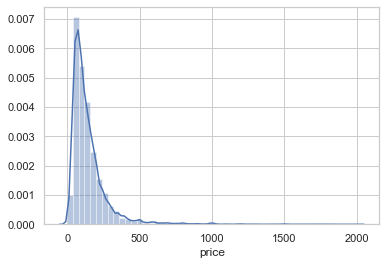

In [354]:
sns.distplot(y_train)

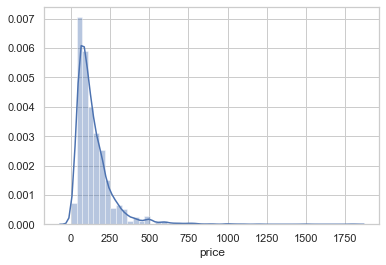

In [355]:
sns.distplot(y_test)

# Model Pipeline

## feature engineering

## feature transform

In [630]:
numeric_transformer = Pipeline(
    steps=[  #('imputer',SimpleImputer(strategy='median')), 
        ('scaler', MinMaxScaler())
    ])
categorical_transformer = Pipeline(
    steps=[('imputer', SimpleImputer(strategy='constant', fill_value='_')
            ), ('onehot', OneHotEncoder(handle_unknown='ignore'))])

text_transformer = Pipeline(
    steps=[('text', CountVectorizer()), ('svd',
                                         TruncatedSVD(n_components=100))])

column_transfomer = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cate_cols),
    ('date', MinMaxScaler(), date_cols),
    #('log', FunctionTransformer(np.log1p), ['bedrooms']),
    ('list', ListTransformer(), list_cols),
], remainder='passthrough')

# preprocessor = Pipeline(
#     steps=[('cols_transformer',
#             column_transfomer), ('pca', TruncatedSVD(n_components=500))])

In [631]:
X = df[num_cols + cate_cols + date_cols + list_cols + lst_100]  #
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.1,
                                                    random_state=10)

X_train = column_transfomer.fit_transform(X_train)
X_test = column_transfomer.transform(X_test)

In [121]:
# for testing
temp_pca = TruncatedSVD(n_components=140, random_state=42)
temp_pca.fit(X_train)

TruncatedSVD(algorithm='randomized', n_components=140, n_iter=5,
             random_state=42, tol=0.0)

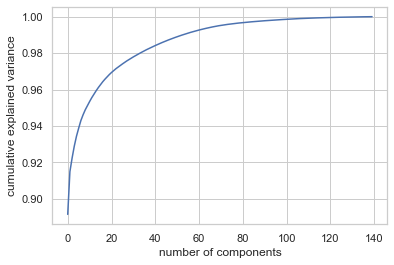

None

In [122]:
sns.set(style='whitegrid')
plt.plot(np.cumsum(temp_pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
#plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())

In [641]:
X_train.shape, X_test.shape

((30184, 118), (3354, 118))

In [640]:
X_train = X_train[:, important_features_ix]
X_test = X_test[:, important_features_ix]
X_final = X_final[:, important_features_ix]

## lgbm

In [633]:
def random_search_cv(reg, params):
    random_reg = RandomizedSearchCV(reg,
                              params,
                              verbose=1,
                              n_jobs=-1,
                              scoring="neg_root_mean_squared_error",
                              cv=5,
                              n_iter=10,
                              refit=True,
                              random_state=42)
    return random_reg

In [634]:
def lgbm_reg(X_train, y_train, X_test, y_test):
    from numpy.random import randint
    lgbm = LGBMRegressor(verbose=1, n_estimators=10000, learning_rate=0.01)

    #train_data = lightgbm.Dataset(X_train, y_train)
    #val_data = lightgbm.Dataset(X_test, y_test, reference=train_data)

    params = {
        "num_leaves": np.arange(10, 50),
        'min_child_samples': np.arange(10, 50),
        'min_child_weight': [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3],
        'max_depth': np.arange(3, 10),
        'subsample': uniform(loc=0.2, scale=0.8),
        'colsample_bytree': uniform(loc=0.4, scale=0.6),
        'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50],
        'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]
    }

    random_lgbm = random_search_cv(lgbm, params)
    random_lgbm.fit(X_train,
                    y_train,
                    eval_set=(X_test, y_test),
                    eval_metric='rmse',
                    early_stopping_rounds=100,
                    verbose=1)

    return random_lgbm

In [127]:
def xgb_reg(X_train, y_train, X_test, y_test):
    xgb = XGBRegressor(verbosity=1, n_estimators=5000)
    params = {
        "max_depth": np.arange(3, 10),
        "learning_rate": [0.01, 0.05],
        'min_child_weight': [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3],
        "gamma": [0.1, 0.2, 0.3],
        "colsample_bytree": [0.3, 0.4, 0.5, 0.7],
        'max_delta_step': [1, 3 ,7],
        'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 20, 50],
        'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]
    }

    random_xgb = random_search_cv(xgb, params)
    random_xgb.fit(X_train,
                   y_train,
                   eval_set= [(X_test, y_test)],
                   eval_metric='rmse',
                   early_stopping_rounds=100,
                   verbose=1)

    return random_xgb

In [25]:
def knn_reg(X_train, y_train):
    knn = KNeighborsRegressor()
    params = {
        "n_neighbors": np.arange(10, 200),
        'algorithm': ['auto', 'kdtree'],
        "leaf_size": np.arange(10, 100)
    }
    
    random_knn = random_search_cv(knn, params)
    random_knn.fit(X_train, y_train)
    
    return random_knn

In [128]:
def svr_reg(X_train, y_train):
    svr = SVR(verbose=1)
    params ={
        "C": [0.01, 0.1, 1, 5, 10],
        "gamma": ['scale', 'auto', 0.1, 1],
        
    }
    
    random_svr = random_search_cv(svr, params)
    random_svr.fit(X_train, y_train)
    
    return random_svr

In [146]:
def ridge_reg(X_train, y_train):
    ridge = Ridge()
    params = {
        "alpha": [0.01, 0.1, 1, 5, 10, 100],
        "max_iter": [1000, 10000]
    }
    
    random_ridge = random_search_cv(ridge, params)
    random_ridge.fit(X_train, y_train)
    
    return random_ridge

def lasso_reg(X_train, y_train):
    lasso = Lasso()
    params = {
        "alpha": [0.01, 0.1, 1, 5, 10, 100],
        "max_iter": [10000, 100000],
        "warm_start": [True, False]
    }
    
    random_lasso = random_search_cv(lasso, params)
    random_lasso.fit(X_train, y_train)
    
    return random_lasso

def elastic_reg(X_train, y_train):
    elasticNet = ElasticNet()
    params = {
        "alpha": [0.01, 0.1, 1, 5, 10, 100],
        "l1_ratio": [0.1, 0.3, 0.5, 0.7, 0.9],
        "max_iter": [1000, 10000],
        "warm_start": [True, False]
    }
    
    random_ElasticNet = random_search_cv(ElasticNet, params)
    random_ElasticNet.fit(X_train, y_train)
    
    return random_ElasticNet

In [33]:
def eval_model(model):
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_test)
    print("RMSE")
    print("Train RMSE: " + str(rmse(y_train, y_train_pred)))
    print("Test RMSE: " + str(rmse(y_test, y_val_pred)))
    print("Train R2: " + str(r2_score(y_train, y_train_pred)))
    print("Test R2: " + str(r2_score(y_test, y_val_pred)))
    try:
        print("Best Params: "+ str(model.best_params_))
        print("Best Score: " + str(model.best_score_))
    except:
        pass

In [645]:
#randSearch_lgbm = lgbm_reg(X_train, y_train, X_test, y_test)
make_submission(randSearch_lgbm.predict(X_final))

,Id,Predicted
0,19307997,483.179588
1,20176193,123.791699
2,19485371,52.359533
3,13079990,65.611146
4,22339757,50.824488
...,...,...
17332,22325617,77.756060
17333,8372650,251.242643
17334,3812554,98.621864
17335,18891508,56.657804


In [643]:
eval_model(randSearch_lgbm)
#rmse(np.expm1(y_test), np.expm1(randSearch_lgbm.predict(X_test)))

RMSE
Train RMSE: 70.18518667273587
Test RMSE: 74.46210619739587
Train R2: 0.726954024922777
Test R2: 0.6238972045236234
Best Params: {'colsample_bytree': 0.6247240713084175, 'max_depth': 7, 'min_child_samples': 24, 'min_child_weight': 0.1, 'num_leaves': 17, 'reg_alpha': 5, 'reg_lambda': 10, 'subsample': 0.3248149123539492}
Best Score: -84.3869780506419


In [644]:
randSearch_lgbm.best_estimator_.feature_importances_

array([ 771, 1525, 1482, 1333,  460,  735, 1048,  926,  521,  279,  190,
       1376,  617, 1052,  458,  384,  248,  315,  290,  211,  471,  347,
        237,  243, 1449,  298,  314,  616,  555,  101,  151,   51,  140,
        221,  226,  290,  110,  246,  604,  780,  783, 1220, 1003,   45,
         39,  374,   51,   17,  156,   21,  124,   83,   11,  264,  232,
        175,   43,    6,  110,   53,  127,   50,   59,   23,   48,   12,
       1267,  963, 1385,   69,  237,  196,  262,  139,  110,  215,  258,
        219,  165,   94,  225,  162,   80,   71, 1184,   29,   41,   78,
         63,   48,   21,   14,   34,   25,  106,   28,   26,   59,  539,
        123,  420,  377,  650,  209,  481,  499,  455,  292,   90,  240,
        462,  641,  319,  661,  735,  318,  324,  215])

In [638]:
a = randSearch_lgbm.best_estimator_.feature_importances_
important_features_ix = np.where(a >= 10)[0]
important_features_ix

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  39,  40,  41,
        42,  43,  44,  45,  47,  48,  50,  59,  65,  68,  69,  70,  71,
        75,  78,  79,  80,  82,  87,  88,  91,  92,  93,  95,  96,  99,
       100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 123, 124, 125, 126,
       128, 129, 130, 131, 132, 133, 134, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157])

## stacking with multiple models

In [129]:
# xgboost
randSearch_xgb = xgb_reg(X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 35.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 58.0min finished


[0]	validation_0-rmse:187.20335
Will train until validation_0-rmse hasn't improved in 100 rounds.
[1]	validation_0-rmse:186.93687
[2]	validation_0-rmse:186.67113
[3]	validation_0-rmse:186.40562
[4]	validation_0-rmse:186.14014
[5]	validation_0-rmse:185.87520
[6]	validation_0-rmse:185.61008
[7]	validation_0-rmse:185.34554
[8]	validation_0-rmse:185.08113
[9]	validation_0-rmse:184.81712
[10]	validation_0-rmse:184.55339
[11]	validation_0-rmse:184.28976
[12]	validation_0-rmse:184.02702
[13]	validation_0-rmse:183.76378
[14]	validation_0-rmse:183.50143
[15]	validation_0-rmse:183.23880
[16]	validation_0-rmse:182.97722
[17]	validation_0-rmse:182.71512
[18]	validation_0-rmse:182.45392
[19]	validation_0-rmse:182.19246
[20]	validation_0-rmse:181.93213
[21]	validation_0-rmse:181.67131
[22]	validation_0-rmse:181.41135
[23]	validation_0-rmse:181.15124
[24]	validation_0-rmse:180.89204
[25]	validation_0-rmse:180.63243
[26]	validation_0-rmse:180.37376
[27]	validation_0-rmse:180.11482
[28]	validation_0-rm

[243]	validation_0-rmse:133.92699
[244]	validation_0-rmse:133.75368
[245]	validation_0-rmse:133.59323
[246]	validation_0-rmse:133.43271
[247]	validation_0-rmse:133.26050
[248]	validation_0-rmse:133.08900
[249]	validation_0-rmse:132.92349
[250]	validation_0-rmse:132.75233
[251]	validation_0-rmse:132.58777
[252]	validation_0-rmse:132.41948
[253]	validation_0-rmse:132.25192
[254]	validation_0-rmse:132.08887
[255]	validation_0-rmse:131.92244
[256]	validation_0-rmse:131.76726
[257]	validation_0-rmse:131.59999
[258]	validation_0-rmse:131.43442
[259]	validation_0-rmse:131.26920
[260]	validation_0-rmse:131.10327
[261]	validation_0-rmse:130.93909
[262]	validation_0-rmse:130.77397
[263]	validation_0-rmse:130.61057
[264]	validation_0-rmse:130.45197
[265]	validation_0-rmse:130.28749
[266]	validation_0-rmse:130.12274
[267]	validation_0-rmse:129.96130
[268]	validation_0-rmse:129.80086
[269]	validation_0-rmse:129.64014
[270]	validation_0-rmse:129.48727
[271]	validation_0-rmse:129.33014
[272]	validati

[484]	validation_0-rmse:104.70740
[485]	validation_0-rmse:104.63008
[486]	validation_0-rmse:104.54713
[487]	validation_0-rmse:104.46735
[488]	validation_0-rmse:104.38577
[489]	validation_0-rmse:104.31020
[490]	validation_0-rmse:104.23989
[491]	validation_0-rmse:104.15943
[492]	validation_0-rmse:104.08633
[493]	validation_0-rmse:104.00633
[494]	validation_0-rmse:103.93211
[495]	validation_0-rmse:103.85120
[496]	validation_0-rmse:103.77866
[497]	validation_0-rmse:103.70406
[498]	validation_0-rmse:103.63405
[499]	validation_0-rmse:103.55370
[500]	validation_0-rmse:103.47555
[501]	validation_0-rmse:103.39503
[502]	validation_0-rmse:103.31609
[503]	validation_0-rmse:103.23841
[504]	validation_0-rmse:103.16360
[505]	validation_0-rmse:103.09269
[506]	validation_0-rmse:103.01814
[507]	validation_0-rmse:102.93893
[508]	validation_0-rmse:102.86041
[509]	validation_0-rmse:102.79034
[510]	validation_0-rmse:102.71524
[511]	validation_0-rmse:102.63575
[512]	validation_0-rmse:102.56118
[513]	validati

[731]	validation_0-rmse:90.77039
[732]	validation_0-rmse:90.72613
[733]	validation_0-rmse:90.68849
[734]	validation_0-rmse:90.65010
[735]	validation_0-rmse:90.61610
[736]	validation_0-rmse:90.57494
[737]	validation_0-rmse:90.53805
[738]	validation_0-rmse:90.49549
[739]	validation_0-rmse:90.44991
[740]	validation_0-rmse:90.40958
[741]	validation_0-rmse:90.37226
[742]	validation_0-rmse:90.33237
[743]	validation_0-rmse:90.28914
[744]	validation_0-rmse:90.24695
[745]	validation_0-rmse:90.20882
[746]	validation_0-rmse:90.16391
[747]	validation_0-rmse:90.12078
[748]	validation_0-rmse:90.07633
[749]	validation_0-rmse:90.03707
[750]	validation_0-rmse:89.99551
[751]	validation_0-rmse:89.95685
[752]	validation_0-rmse:89.91994
[753]	validation_0-rmse:89.88011
[754]	validation_0-rmse:89.84020
[755]	validation_0-rmse:89.80397
[756]	validation_0-rmse:89.76237
[757]	validation_0-rmse:89.72395
[758]	validation_0-rmse:89.68515
[759]	validation_0-rmse:89.65150
[760]	validation_0-rmse:89.61323
[761]	vali

[980]	validation_0-rmse:83.45007
[981]	validation_0-rmse:83.42487
[982]	validation_0-rmse:83.40080
[983]	validation_0-rmse:83.37263
[984]	validation_0-rmse:83.35023
[985]	validation_0-rmse:83.32838
[986]	validation_0-rmse:83.30855
[987]	validation_0-rmse:83.28335
[988]	validation_0-rmse:83.26244
[989]	validation_0-rmse:83.23794
[990]	validation_0-rmse:83.21066
[991]	validation_0-rmse:83.19501
[992]	validation_0-rmse:83.17339
[993]	validation_0-rmse:83.15390
[994]	validation_0-rmse:83.13477
[995]	validation_0-rmse:83.11555
[996]	validation_0-rmse:83.08778
[997]	validation_0-rmse:83.06711
[998]	validation_0-rmse:83.04540
[999]	validation_0-rmse:83.02301
[1000]	validation_0-rmse:82.99612
[1001]	validation_0-rmse:82.98984
[1002]	validation_0-rmse:82.96350
[1003]	validation_0-rmse:82.94038
[1004]	validation_0-rmse:82.93005
[1005]	validation_0-rmse:82.90011
[1006]	validation_0-rmse:82.88007
[1007]	validation_0-rmse:82.85902
[1008]	validation_0-rmse:82.83757
[1009]	validation_0-rmse:82.81398


[1222]	validation_0-rmse:79.43478
[1223]	validation_0-rmse:79.42307
[1224]	validation_0-rmse:79.41067
[1225]	validation_0-rmse:79.39565
[1226]	validation_0-rmse:79.38171
[1227]	validation_0-rmse:79.37098
[1228]	validation_0-rmse:79.35822
[1229]	validation_0-rmse:79.35053
[1230]	validation_0-rmse:79.34055
[1231]	validation_0-rmse:79.32682
[1232]	validation_0-rmse:79.31361
[1233]	validation_0-rmse:79.30215
[1234]	validation_0-rmse:79.28938
[1235]	validation_0-rmse:79.28217
[1236]	validation_0-rmse:79.26692
[1237]	validation_0-rmse:79.24889
[1238]	validation_0-rmse:79.23473
[1239]	validation_0-rmse:79.21944
[1240]	validation_0-rmse:79.20727
[1241]	validation_0-rmse:79.19502
[1242]	validation_0-rmse:79.18036
[1243]	validation_0-rmse:79.17082
[1244]	validation_0-rmse:79.15604
[1245]	validation_0-rmse:79.15157
[1246]	validation_0-rmse:79.13515
[1247]	validation_0-rmse:79.12394
[1248]	validation_0-rmse:79.11431
[1249]	validation_0-rmse:79.09889
[1250]	validation_0-rmse:79.08717
[1251]	validat

[1463]	validation_0-rmse:77.39262
[1464]	validation_0-rmse:77.38759
[1465]	validation_0-rmse:77.38497
[1466]	validation_0-rmse:77.38110
[1467]	validation_0-rmse:77.37595
[1468]	validation_0-rmse:77.36639
[1469]	validation_0-rmse:77.36013
[1470]	validation_0-rmse:77.35947
[1471]	validation_0-rmse:77.34927
[1472]	validation_0-rmse:77.34470
[1473]	validation_0-rmse:77.33448
[1474]	validation_0-rmse:77.32319
[1475]	validation_0-rmse:77.31473
[1476]	validation_0-rmse:77.31002
[1477]	validation_0-rmse:77.29926
[1478]	validation_0-rmse:77.30411
[1479]	validation_0-rmse:77.30112
[1480]	validation_0-rmse:77.29301
[1481]	validation_0-rmse:77.29369
[1482]	validation_0-rmse:77.29218
[1483]	validation_0-rmse:77.28919
[1484]	validation_0-rmse:77.28384
[1485]	validation_0-rmse:77.27928
[1486]	validation_0-rmse:77.27928
[1487]	validation_0-rmse:77.28182
[1488]	validation_0-rmse:77.27734
[1489]	validation_0-rmse:77.26775
[1490]	validation_0-rmse:77.26091
[1491]	validation_0-rmse:77.25295
[1492]	validat

[1704]	validation_0-rmse:76.35927
[1705]	validation_0-rmse:76.35706
[1706]	validation_0-rmse:76.35292
[1707]	validation_0-rmse:76.35053
[1708]	validation_0-rmse:76.34560
[1709]	validation_0-rmse:76.33672
[1710]	validation_0-rmse:76.33670
[1711]	validation_0-rmse:76.32948
[1712]	validation_0-rmse:76.32770
[1713]	validation_0-rmse:76.32394
[1714]	validation_0-rmse:76.31939
[1715]	validation_0-rmse:76.31979
[1716]	validation_0-rmse:76.31522
[1717]	validation_0-rmse:76.31541
[1718]	validation_0-rmse:76.31824
[1719]	validation_0-rmse:76.31300
[1720]	validation_0-rmse:76.31520
[1721]	validation_0-rmse:76.31197
[1722]	validation_0-rmse:76.30528
[1723]	validation_0-rmse:76.30471
[1724]	validation_0-rmse:76.30167
[1725]	validation_0-rmse:76.29744
[1726]	validation_0-rmse:76.29509
[1727]	validation_0-rmse:76.29108
[1728]	validation_0-rmse:76.28655
[1729]	validation_0-rmse:76.28435
[1730]	validation_0-rmse:76.28644
[1731]	validation_0-rmse:76.28252
[1732]	validation_0-rmse:76.27807
[1733]	validat

[1945]	validation_0-rmse:75.97601
[1946]	validation_0-rmse:75.97236
[1947]	validation_0-rmse:75.97075
[1948]	validation_0-rmse:75.96799
[1949]	validation_0-rmse:75.96480
[1950]	validation_0-rmse:75.96753
[1951]	validation_0-rmse:75.96808
[1952]	validation_0-rmse:75.96677
[1953]	validation_0-rmse:75.96508
[1954]	validation_0-rmse:75.96103
[1955]	validation_0-rmse:75.96456
[1956]	validation_0-rmse:75.96699
[1957]	validation_0-rmse:75.97620
[1958]	validation_0-rmse:75.97805
[1959]	validation_0-rmse:75.97561
[1960]	validation_0-rmse:75.97545
[1961]	validation_0-rmse:75.97821
[1962]	validation_0-rmse:75.97852
[1963]	validation_0-rmse:75.97720
[1964]	validation_0-rmse:75.97858
[1965]	validation_0-rmse:75.98244
[1966]	validation_0-rmse:75.98184
[1967]	validation_0-rmse:75.99161
[1968]	validation_0-rmse:75.99123
[1969]	validation_0-rmse:75.99037
[1970]	validation_0-rmse:75.99149
[1971]	validation_0-rmse:75.99080
[1972]	validation_0-rmse:75.99080
[1973]	validation_0-rmse:75.98876
[1974]	validat

In [131]:
#save_model(randSearch_xgb, "random_xgb")
#save_model(randSearch_xgb.best_estimator_, "best_xgb")
eval_model(randSearch_xgb)

RMSE
Train RMSE: 72.46335346481933
Test RMSE: 75.96103282649044
Train R2: 0.7089405413077235
Test R2: 0.6086028571029886
Best Params: {'reg_lambda': 5, 'reg_alpha': 20, 'min_child_weight': 0.1, 'max_depth': 7, 'max_delta_step': 7, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.5}
Best Score: -87.55622347768957


In [124]:
# knn
randSearch_knn = knn_reg(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  5.3min finished


In [205]:
save_model(randSearch_knn, "random_knn")
save_model(randSearch_knn.best_estimator_, "best_knn")
# eval_model(randSearch_knn)

RMSE
Train RMSE: 103.61813540311539
Test RMSE: 108.76656329986805
Best Params: {'weights': 'uniform', 'n_neighbors': 60, 'leaf_size': 12, 'algorithm': 'auto'}
Best Score: -106.21092632843352


In [133]:
# SVR
randSearch_svr = svr_reg(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 27.0min finished


[LibSVM]

In [134]:
eval_model(randSearch_svr)

RMSE
Train RMSE: 108.31343288638355
Test RMSE: 99.83071576581169
Train R2: 0.3497063675103226
Test R2: 0.3239725999006552
Best Params: {'gamma': 0.1, 'C': 10}
Best Score: -111.80537402326081


In [137]:
# ridge
randSearch_ridge = ridge_reg(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    5.5s finished


In [138]:
eval_model(randSearch_ridge)

RMSE
Train RMSE: 92.21367222674715
Test RMSE: 82.81840088023806
Train R2: 0.528658700403937
Test R2: 0.5347465417094214
Best Params: {'max_iter': 1000, 'alpha': 0.1}
Best Score: -93.65404439603972


In [145]:
# lasso
randSearch_lasso = lasso_reg(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.2min finished


In [147]:
eval_model(randSearch_lasso)

RMSE
Train RMSE: 92.38841852050194
Test RMSE: 83.02268385141397
Train R2: 0.5268706100958356
Test R2: 0.5324484877370355
Best Params: {'warm_start': True, 'max_iter': 10000, 'alpha': 0.01}
Best Score: -93.51756846719118


In [ ]:
# elastic net
randSearch_elastic = elastic_reg(X_train, y_train)

In [ ]:
eval_model(randSearch_elastic)

## Random forest

In [458]:
def rf_reg(X_train, y_train):
    rf_reg = RandomForestRegressor(verbose=1)

    params = {
        'n_estimators': np.arange(100, 500),
        'max_depth': np.arange(3, 8),
        'min_samples_split': np.arange(3, 10),
        'min_samples_leaf': np.arange(3, 10),
        'max_features': ['auto', None],
        'warm_start': [True, False],
        'bootstrap': [True, False]
    }

    reg = RandomizedSearchCV(rf_reg,
                             params,
                             scoring='neg_root_mean_squared_error',
                             n_jobs=-1,
                             verbose=2,
                             random_state=42)
    
    # train 
    reg.fit(X_train, y_train)
    
    return reg

In [459]:
randSearch_reg = rf_reg(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  6.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 219 out of 219 | elapsed:   37.3s finished


## lgbm stacking

In [499]:
def stacked_lgbm(X, y, num_lgbm=20):
    def eval_model(model, y, y_pred):
        print("RMSE: " + str(rmse(y, y_pred)))
        print("R2: " + str(r2_score(y, y_pred)))
       

    y_preds = []
    y_preds_final = []
    for i in range(num_lgbm):
        # split train test
        X_train, X_val, y_train, y_val = train_test_split(X,
                                                          y,
                                                          test_size=0.2,
                                                          random_state=i * 7)

        X_train = column_transfomer.fit_transform(X_train)
        X_val = column_transfomer.transform(X_val)
        # X_ = column_transfomer.transform(X)
        # X_test_ = column_transfomer.transform(X_test)

        randSearch_lgbm = lgbm_reg(X_train, y_train, X_val, y_val)
        print(
            "========================================================================"
        )
        print("Model #" + str(i))
        y_train_pred = randSearch_lgbm.predict(X_train)
        y_val_pred = randSearch_lgbm.predict(X_val)
        print('Train: ')
        print(eval_model(randSearch_lgbm, y_train, y_train_pred))
        print('--------------------------')
        print('Test: ')
        print(eval_model(randSearch_lgbm, y_val, y_val_pred))
        print(
            "========================================================================"
        )

        # append results
        X_final_ = column_transfomer.transform(test_df[num_cols + cate_cols +
                                                        date_cols+ list_cols+ lst_100])
        y_pred_final = randSearch_lgbm.predict(X_final_)
        y_preds.append(y_train_pred)
        #if rmse(y_val, y_val_pred) < 88:
        y_preds_final.append(y_pred_final)

    return np.array(y_preds).T, np.array(y_preds_final).T


def lasso_meta(y, y_preds, y_preds_final):
    # transpose y_preds
    lasso_meta = Lasso()
    lasso_meta.fit(y_preds, y)
    Y_FINAL = lasso_meta.predict(y_preds_final)
    return Y_FINAL, y_preds_final

In [500]:
y_preds, y_preds_final = stacked_lgbm(X, y, num_lgbm=5)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  6.5min finished


[1]	valid_0's rmse: 132.688	valid_0's l2: 17606
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 132.11	valid_0's l2: 17453
[3]	valid_0's rmse: 131.587	valid_0's l2: 17315.1
[4]	valid_0's rmse: 130.99	valid_0's l2: 17158.4
[5]	valid_0's rmse: 130.465	valid_0's l2: 17021.2
[6]	valid_0's rmse: 129.916	valid_0's l2: 16878.2
[7]	valid_0's rmse: 129.356	valid_0's l2: 16733
[8]	valid_0's rmse: 128.832	valid_0's l2: 16597.8
[9]	valid_0's rmse: 128.335	valid_0's l2: 16469.9
[10]	valid_0's rmse: 127.819	valid_0's l2: 16337.7
[11]	valid_0's rmse: 127.312	valid_0's l2: 16208.4
[12]	valid_0's rmse: 126.795	valid_0's l2: 16077
[13]	valid_0's rmse: 126.271	valid_0's l2: 15944.2
[14]	valid_0's rmse: 125.813	valid_0's l2: 15829
[15]	valid_0's rmse: 125.339	valid_0's l2: 15709.8
[16]	valid_0's rmse: 124.898	valid_0's l2: 15599.5
[17]	valid_0's rmse: 124.41	valid_0's l2: 15477.9
[18]	valid_0's rmse: 123.929	valid_0's l2: 15358.3
[19]	valid_0's rmse: 123.468	valid_0's l2

[199]	valid_0's rmse: 91.6719	valid_0's l2: 8403.73
[200]	valid_0's rmse: 91.6104	valid_0's l2: 8392.47
[201]	valid_0's rmse: 91.5686	valid_0's l2: 8384.81
[202]	valid_0's rmse: 91.5198	valid_0's l2: 8375.88
[203]	valid_0's rmse: 91.4705	valid_0's l2: 8366.86
[204]	valid_0's rmse: 91.4225	valid_0's l2: 8358.08
[205]	valid_0's rmse: 91.3726	valid_0's l2: 8348.96
[206]	valid_0's rmse: 91.3223	valid_0's l2: 8339.76
[207]	valid_0's rmse: 91.2685	valid_0's l2: 8329.93
[208]	valid_0's rmse: 91.2091	valid_0's l2: 8319.11
[209]	valid_0's rmse: 91.1716	valid_0's l2: 8312.26
[210]	valid_0's rmse: 91.1132	valid_0's l2: 8301.61
[211]	valid_0's rmse: 91.0587	valid_0's l2: 8291.7
[212]	valid_0's rmse: 91.0148	valid_0's l2: 8283.7
[213]	valid_0's rmse: 90.9747	valid_0's l2: 8276.39
[214]	valid_0's rmse: 90.9361	valid_0's l2: 8269.38
[215]	valid_0's rmse: 90.8925	valid_0's l2: 8261.45
[216]	valid_0's rmse: 90.8488	valid_0's l2: 8253.51
[217]	valid_0's rmse: 90.8159	valid_0's l2: 8247.52
[218]	valid_0'

[374]	valid_0's rmse: 86.5543	valid_0's l2: 7491.65
[375]	valid_0's rmse: 86.5353	valid_0's l2: 7488.37
[376]	valid_0's rmse: 86.5148	valid_0's l2: 7484.8
[377]	valid_0's rmse: 86.4951	valid_0's l2: 7481.4
[378]	valid_0's rmse: 86.4745	valid_0's l2: 7477.84
[379]	valid_0's rmse: 86.4578	valid_0's l2: 7474.95
[380]	valid_0's rmse: 86.4387	valid_0's l2: 7471.64
[381]	valid_0's rmse: 86.4232	valid_0's l2: 7468.96
[382]	valid_0's rmse: 86.4112	valid_0's l2: 7466.89
[383]	valid_0's rmse: 86.3966	valid_0's l2: 7464.38
[384]	valid_0's rmse: 86.3655	valid_0's l2: 7459.01
[385]	valid_0's rmse: 86.3479	valid_0's l2: 7455.97
[386]	valid_0's rmse: 86.322	valid_0's l2: 7451.49
[387]	valid_0's rmse: 86.3119	valid_0's l2: 7449.74
[388]	valid_0's rmse: 86.2964	valid_0's l2: 7447.06
[389]	valid_0's rmse: 86.2777	valid_0's l2: 7443.84
[390]	valid_0's rmse: 86.2634	valid_0's l2: 7441.37
[391]	valid_0's rmse: 86.2448	valid_0's l2: 7438.16
[392]	valid_0's rmse: 86.2306	valid_0's l2: 7435.72
[393]	valid_0's

[534]	valid_0's rmse: 84.7023	valid_0's l2: 7174.49
[535]	valid_0's rmse: 84.692	valid_0's l2: 7172.74
[536]	valid_0's rmse: 84.6854	valid_0's l2: 7171.62
[537]	valid_0's rmse: 84.6769	valid_0's l2: 7170.18
[538]	valid_0's rmse: 84.6645	valid_0's l2: 7168.08
[539]	valid_0's rmse: 84.656	valid_0's l2: 7166.64
[540]	valid_0's rmse: 84.6435	valid_0's l2: 7164.52
[541]	valid_0's rmse: 84.6349	valid_0's l2: 7163.06
[542]	valid_0's rmse: 84.6317	valid_0's l2: 7162.53
[543]	valid_0's rmse: 84.628	valid_0's l2: 7161.9
[544]	valid_0's rmse: 84.617	valid_0's l2: 7160.03
[545]	valid_0's rmse: 84.6055	valid_0's l2: 7158.08
[546]	valid_0's rmse: 84.5933	valid_0's l2: 7156.03
[547]	valid_0's rmse: 84.5901	valid_0's l2: 7155.48
[548]	valid_0's rmse: 84.581	valid_0's l2: 7153.95
[549]	valid_0's rmse: 84.5808	valid_0's l2: 7153.91
[550]	valid_0's rmse: 84.5722	valid_0's l2: 7152.46
[551]	valid_0's rmse: 84.5662	valid_0's l2: 7151.45
[552]	valid_0's rmse: 84.5564	valid_0's l2: 7149.78
[553]	valid_0's rm

[697]	valid_0's rmse: 83.6449	valid_0's l2: 6996.47
[698]	valid_0's rmse: 83.643	valid_0's l2: 6996.16
[699]	valid_0's rmse: 83.6323	valid_0's l2: 6994.36
[700]	valid_0's rmse: 83.6282	valid_0's l2: 6993.68
[701]	valid_0's rmse: 83.6271	valid_0's l2: 6993.48
[702]	valid_0's rmse: 83.6144	valid_0's l2: 6991.37
[703]	valid_0's rmse: 83.6077	valid_0's l2: 6990.24
[704]	valid_0's rmse: 83.6055	valid_0's l2: 6989.88
[705]	valid_0's rmse: 83.6036	valid_0's l2: 6989.56
[706]	valid_0's rmse: 83.6021	valid_0's l2: 6989.31
[707]	valid_0's rmse: 83.5969	valid_0's l2: 6988.45
[708]	valid_0's rmse: 83.5904	valid_0's l2: 6987.36
[709]	valid_0's rmse: 83.5888	valid_0's l2: 6987.09
[710]	valid_0's rmse: 83.5842	valid_0's l2: 6986.32
[711]	valid_0's rmse: 83.5817	valid_0's l2: 6985.9
[712]	valid_0's rmse: 83.5806	valid_0's l2: 6985.72
[713]	valid_0's rmse: 83.5751	valid_0's l2: 6984.8
[714]	valid_0's rmse: 83.5664	valid_0's l2: 6983.34
[715]	valid_0's rmse: 83.5618	valid_0's l2: 6982.58
[716]	valid_0's

[859]	valid_0's rmse: 83.0784	valid_0's l2: 6902.02
[860]	valid_0's rmse: 83.0734	valid_0's l2: 6901.18
[861]	valid_0's rmse: 83.0686	valid_0's l2: 6900.4
[862]	valid_0's rmse: 83.0677	valid_0's l2: 6900.25
[863]	valid_0's rmse: 83.0648	valid_0's l2: 6899.76
[864]	valid_0's rmse: 83.0615	valid_0's l2: 6899.22
[865]	valid_0's rmse: 83.0585	valid_0's l2: 6898.71
[866]	valid_0's rmse: 83.0499	valid_0's l2: 6897.28
[867]	valid_0's rmse: 83.0474	valid_0's l2: 6896.88
[868]	valid_0's rmse: 83.0453	valid_0's l2: 6896.52
[869]	valid_0's rmse: 83.0454	valid_0's l2: 6896.54
[870]	valid_0's rmse: 83.0427	valid_0's l2: 6896.1
[871]	valid_0's rmse: 83.0414	valid_0's l2: 6895.88
[872]	valid_0's rmse: 83.0358	valid_0's l2: 6894.95
[873]	valid_0's rmse: 83.0309	valid_0's l2: 6894.12
[874]	valid_0's rmse: 83.0264	valid_0's l2: 6893.39
[875]	valid_0's rmse: 83.022	valid_0's l2: 6892.65
[876]	valid_0's rmse: 83.0187	valid_0's l2: 6892.11
[877]	valid_0's rmse: 83.0152	valid_0's l2: 6891.52
[878]	valid_0's

[1023]	valid_0's rmse: 82.7113	valid_0's l2: 6841.16
[1024]	valid_0's rmse: 82.711	valid_0's l2: 6841.1
[1025]	valid_0's rmse: 82.7096	valid_0's l2: 6840.88
[1026]	valid_0's rmse: 82.7082	valid_0's l2: 6840.64
[1027]	valid_0's rmse: 82.7047	valid_0's l2: 6840.07
[1028]	valid_0's rmse: 82.7025	valid_0's l2: 6839.71
[1029]	valid_0's rmse: 82.6936	valid_0's l2: 6838.22
[1030]	valid_0's rmse: 82.6916	valid_0's l2: 6837.91
[1031]	valid_0's rmse: 82.6913	valid_0's l2: 6837.85
[1032]	valid_0's rmse: 82.6895	valid_0's l2: 6837.55
[1033]	valid_0's rmse: 82.6891	valid_0's l2: 6837.48
[1034]	valid_0's rmse: 82.6888	valid_0's l2: 6837.44
[1035]	valid_0's rmse: 82.6868	valid_0's l2: 6837.11
[1036]	valid_0's rmse: 82.6803	valid_0's l2: 6836.04
[1037]	valid_0's rmse: 82.6798	valid_0's l2: 6835.94
[1038]	valid_0's rmse: 82.6766	valid_0's l2: 6835.43
[1039]	valid_0's rmse: 82.6729	valid_0's l2: 6834.81
[1040]	valid_0's rmse: 82.6732	valid_0's l2: 6834.85
[1041]	valid_0's rmse: 82.6706	valid_0's l2: 683

[1179]	valid_0's rmse: 82.4317	valid_0's l2: 6794.98
[1180]	valid_0's rmse: 82.4298	valid_0's l2: 6794.67
[1181]	valid_0's rmse: 82.4309	valid_0's l2: 6794.86
[1182]	valid_0's rmse: 82.4296	valid_0's l2: 6794.64
[1183]	valid_0's rmse: 82.4294	valid_0's l2: 6794.61
[1184]	valid_0's rmse: 82.4285	valid_0's l2: 6794.45
[1185]	valid_0's rmse: 82.4284	valid_0's l2: 6794.44
[1186]	valid_0's rmse: 82.4265	valid_0's l2: 6794.13
[1187]	valid_0's rmse: 82.4267	valid_0's l2: 6794.16
[1188]	valid_0's rmse: 82.4253	valid_0's l2: 6793.93
[1189]	valid_0's rmse: 82.4238	valid_0's l2: 6793.69
[1190]	valid_0's rmse: 82.4232	valid_0's l2: 6793.58
[1191]	valid_0's rmse: 82.4217	valid_0's l2: 6793.33
[1192]	valid_0's rmse: 82.4164	valid_0's l2: 6792.47
[1193]	valid_0's rmse: 82.4122	valid_0's l2: 6791.77
[1194]	valid_0's rmse: 82.4121	valid_0's l2: 6791.75
[1195]	valid_0's rmse: 82.4106	valid_0's l2: 6791.51
[1196]	valid_0's rmse: 82.4064	valid_0's l2: 6790.82
[1197]	valid_0's rmse: 82.4078	valid_0's l2: 6

[1390]	valid_0's rmse: 82.2049	valid_0's l2: 6757.64
[1391]	valid_0's rmse: 82.2038	valid_0's l2: 6757.47
[1392]	valid_0's rmse: 82.2021	valid_0's l2: 6757.19
[1393]	valid_0's rmse: 82.202	valid_0's l2: 6757.16
[1394]	valid_0's rmse: 82.2032	valid_0's l2: 6757.37
[1395]	valid_0's rmse: 82.202	valid_0's l2: 6757.17
[1396]	valid_0's rmse: 82.2029	valid_0's l2: 6757.32
[1397]	valid_0's rmse: 82.2005	valid_0's l2: 6756.93
[1398]	valid_0's rmse: 82.1995	valid_0's l2: 6756.75
[1399]	valid_0's rmse: 82.1974	valid_0's l2: 6756.41
[1400]	valid_0's rmse: 82.1964	valid_0's l2: 6756.24
[1401]	valid_0's rmse: 82.1971	valid_0's l2: 6756.37
[1402]	valid_0's rmse: 82.1961	valid_0's l2: 6756.2
[1403]	valid_0's rmse: 82.1975	valid_0's l2: 6756.43
[1404]	valid_0's rmse: 82.193	valid_0's l2: 6755.69
[1405]	valid_0's rmse: 82.1898	valid_0's l2: 6755.16
[1406]	valid_0's rmse: 82.1892	valid_0's l2: 6755.07
[1407]	valid_0's rmse: 82.1872	valid_0's l2: 6754.73
[1408]	valid_0's rmse: 82.1871	valid_0's l2: 6754.

[1584]	valid_0's rmse: 82.0362	valid_0's l2: 6729.95
[1585]	valid_0's rmse: 82.035	valid_0's l2: 6729.74
[1586]	valid_0's rmse: 82.034	valid_0's l2: 6729.58
[1587]	valid_0's rmse: 82.0337	valid_0's l2: 6729.54
[1588]	valid_0's rmse: 82.0324	valid_0's l2: 6729.31
[1589]	valid_0's rmse: 82.0332	valid_0's l2: 6729.44
[1590]	valid_0's rmse: 82.0294	valid_0's l2: 6728.82
[1591]	valid_0's rmse: 82.0284	valid_0's l2: 6728.66
[1592]	valid_0's rmse: 82.0286	valid_0's l2: 6728.69
[1593]	valid_0's rmse: 82.0276	valid_0's l2: 6728.53
[1594]	valid_0's rmse: 82.0275	valid_0's l2: 6728.51
[1595]	valid_0's rmse: 82.0259	valid_0's l2: 6728.25
[1596]	valid_0's rmse: 82.026	valid_0's l2: 6728.27
[1597]	valid_0's rmse: 82.0269	valid_0's l2: 6728.41
[1598]	valid_0's rmse: 82.0257	valid_0's l2: 6728.22
[1599]	valid_0's rmse: 82.0267	valid_0's l2: 6728.38
[1600]	valid_0's rmse: 82.0279	valid_0's l2: 6728.58
[1601]	valid_0's rmse: 82.0286	valid_0's l2: 6728.68
[1602]	valid_0's rmse: 82.0316	valid_0's l2: 6729

[1764]	valid_0's rmse: 81.9653	valid_0's l2: 6718.31
[1765]	valid_0's rmse: 81.9662	valid_0's l2: 6718.46
[1766]	valid_0's rmse: 81.9676	valid_0's l2: 6718.68
[1767]	valid_0's rmse: 81.9658	valid_0's l2: 6718.39
[1768]	valid_0's rmse: 81.9655	valid_0's l2: 6718.35
[1769]	valid_0's rmse: 81.965	valid_0's l2: 6718.27
[1770]	valid_0's rmse: 81.963	valid_0's l2: 6717.93
[1771]	valid_0's rmse: 81.9623	valid_0's l2: 6717.83
[1772]	valid_0's rmse: 81.9615	valid_0's l2: 6717.7
[1773]	valid_0's rmse: 81.9608	valid_0's l2: 6717.57
[1774]	valid_0's rmse: 81.9553	valid_0's l2: 6716.66
[1775]	valid_0's rmse: 81.9565	valid_0's l2: 6716.87
[1776]	valid_0's rmse: 81.9581	valid_0's l2: 6717.14
[1777]	valid_0's rmse: 81.9583	valid_0's l2: 6717.16
[1778]	valid_0's rmse: 81.9574	valid_0's l2: 6717.01
[1779]	valid_0's rmse: 81.9574	valid_0's l2: 6717.02
[1780]	valid_0's rmse: 81.9562	valid_0's l2: 6716.82
[1781]	valid_0's rmse: 81.9564	valid_0's l2: 6716.85
[1782]	valid_0's rmse: 81.954	valid_0's l2: 6716.

[1923]	valid_0's rmse: 81.8761	valid_0's l2: 6703.69
[1924]	valid_0's rmse: 81.8761	valid_0's l2: 6703.7
[1925]	valid_0's rmse: 81.8748	valid_0's l2: 6703.49
[1926]	valid_0's rmse: 81.8719	valid_0's l2: 6703.02
[1927]	valid_0's rmse: 81.8711	valid_0's l2: 6702.88
[1928]	valid_0's rmse: 81.8708	valid_0's l2: 6702.83
[1929]	valid_0's rmse: 81.8699	valid_0's l2: 6702.67
[1930]	valid_0's rmse: 81.8676	valid_0's l2: 6702.3
[1931]	valid_0's rmse: 81.8669	valid_0's l2: 6702.19
[1932]	valid_0's rmse: 81.8668	valid_0's l2: 6702.18
[1933]	valid_0's rmse: 81.8661	valid_0's l2: 6702.06
[1934]	valid_0's rmse: 81.8657	valid_0's l2: 6702
[1935]	valid_0's rmse: 81.8666	valid_0's l2: 6702.13
[1936]	valid_0's rmse: 81.8668	valid_0's l2: 6702.17
[1937]	valid_0's rmse: 81.8635	valid_0's l2: 6701.63
[1938]	valid_0's rmse: 81.8635	valid_0's l2: 6701.63
[1939]	valid_0's rmse: 81.8645	valid_0's l2: 6701.8
[1940]	valid_0's rmse: 81.8643	valid_0's l2: 6701.77
[1941]	valid_0's rmse: 81.8646	valid_0's l2: 6701.82

[2127]	valid_0's rmse: 81.7791	valid_0's l2: 6687.82
[2128]	valid_0's rmse: 81.7788	valid_0's l2: 6687.77
[2129]	valid_0's rmse: 81.7768	valid_0's l2: 6687.45
[2130]	valid_0's rmse: 81.7766	valid_0's l2: 6687.42
[2131]	valid_0's rmse: 81.7767	valid_0's l2: 6687.43
[2132]	valid_0's rmse: 81.7768	valid_0's l2: 6687.44
[2133]	valid_0's rmse: 81.7765	valid_0's l2: 6687.4
[2134]	valid_0's rmse: 81.7767	valid_0's l2: 6687.43
[2135]	valid_0's rmse: 81.7775	valid_0's l2: 6687.56
[2136]	valid_0's rmse: 81.7772	valid_0's l2: 6687.51
[2137]	valid_0's rmse: 81.7773	valid_0's l2: 6687.52
[2138]	valid_0's rmse: 81.7755	valid_0's l2: 6687.24
[2139]	valid_0's rmse: 81.7733	valid_0's l2: 6686.86
[2140]	valid_0's rmse: 81.7728	valid_0's l2: 6686.8
[2141]	valid_0's rmse: 81.7734	valid_0's l2: 6686.89
[2142]	valid_0's rmse: 81.7733	valid_0's l2: 6686.87
[2143]	valid_0's rmse: 81.7735	valid_0's l2: 6686.91
[2144]	valid_0's rmse: 81.7698	valid_0's l2: 6686.3
[2145]	valid_0's rmse: 81.7691	valid_0's l2: 6686

[2296]	valid_0's rmse: 81.7135	valid_0's l2: 6677.1
[2297]	valid_0's rmse: 81.7123	valid_0's l2: 6676.9
[2298]	valid_0's rmse: 81.7117	valid_0's l2: 6676.8
[2299]	valid_0's rmse: 81.7109	valid_0's l2: 6676.67
[2300]	valid_0's rmse: 81.7081	valid_0's l2: 6676.21
[2301]	valid_0's rmse: 81.7069	valid_0's l2: 6676.01
[2302]	valid_0's rmse: 81.7063	valid_0's l2: 6675.91
[2303]	valid_0's rmse: 81.7065	valid_0's l2: 6675.95
[2304]	valid_0's rmse: 81.7068	valid_0's l2: 6676
[2305]	valid_0's rmse: 81.7043	valid_0's l2: 6675.59
[2306]	valid_0's rmse: 81.7041	valid_0's l2: 6675.56
[2307]	valid_0's rmse: 81.705	valid_0's l2: 6675.7
[2308]	valid_0's rmse: 81.7041	valid_0's l2: 6675.56
[2309]	valid_0's rmse: 81.7041	valid_0's l2: 6675.57
[2310]	valid_0's rmse: 81.7036	valid_0's l2: 6675.49
[2311]	valid_0's rmse: 81.7033	valid_0's l2: 6675.43
[2312]	valid_0's rmse: 81.7031	valid_0's l2: 6675.4
[2313]	valid_0's rmse: 81.7042	valid_0's l2: 6675.58
[2314]	valid_0's rmse: 81.7037	valid_0's l2: 6675.5
[23

[2470]	valid_0's rmse: 81.6472	valid_0's l2: 6666.27
[2471]	valid_0's rmse: 81.6477	valid_0's l2: 6666.34
[2472]	valid_0's rmse: 81.6482	valid_0's l2: 6666.42
[2473]	valid_0's rmse: 81.648	valid_0's l2: 6666.4
[2474]	valid_0's rmse: 81.6489	valid_0's l2: 6666.55
[2475]	valid_0's rmse: 81.6489	valid_0's l2: 6666.55
[2476]	valid_0's rmse: 81.6489	valid_0's l2: 6666.54
[2477]	valid_0's rmse: 81.6493	valid_0's l2: 6666.61
[2478]	valid_0's rmse: 81.6492	valid_0's l2: 6666.6
[2479]	valid_0's rmse: 81.6523	valid_0's l2: 6667.09
[2480]	valid_0's rmse: 81.652	valid_0's l2: 6667.05
[2481]	valid_0's rmse: 81.6525	valid_0's l2: 6667.14
[2482]	valid_0's rmse: 81.6533	valid_0's l2: 6667.26
[2483]	valid_0's rmse: 81.6535	valid_0's l2: 6667.3
[2484]	valid_0's rmse: 81.653	valid_0's l2: 6667.22
[2485]	valid_0's rmse: 81.6522	valid_0's l2: 6667.09
[2486]	valid_0's rmse: 81.6524	valid_0's l2: 6667.11
[2487]	valid_0's rmse: 81.6524	valid_0's l2: 6667.11
[2488]	valid_0's rmse: 81.6521	valid_0's l2: 6667.06

[2658]	valid_0's rmse: 81.6323	valid_0's l2: 6663.83
[2659]	valid_0's rmse: 81.6333	valid_0's l2: 6664
[2660]	valid_0's rmse: 81.6332	valid_0's l2: 6663.97
[2661]	valid_0's rmse: 81.633	valid_0's l2: 6663.95
[2662]	valid_0's rmse: 81.6327	valid_0's l2: 6663.89
[2663]	valid_0's rmse: 81.6315	valid_0's l2: 6663.7
[2664]	valid_0's rmse: 81.6319	valid_0's l2: 6663.77
[2665]	valid_0's rmse: 81.6325	valid_0's l2: 6663.87
[2666]	valid_0's rmse: 81.631	valid_0's l2: 6663.62
[2667]	valid_0's rmse: 81.6316	valid_0's l2: 6663.73
[2668]	valid_0's rmse: 81.6305	valid_0's l2: 6663.54
[2669]	valid_0's rmse: 81.6301	valid_0's l2: 6663.47
[2670]	valid_0's rmse: 81.6294	valid_0's l2: 6663.36
[2671]	valid_0's rmse: 81.6304	valid_0's l2: 6663.52
[2672]	valid_0's rmse: 81.6304	valid_0's l2: 6663.52
[2673]	valid_0's rmse: 81.63	valid_0's l2: 6663.46
[2674]	valid_0's rmse: 81.6307	valid_0's l2: 6663.57
[2675]	valid_0's rmse: 81.6308	valid_0's l2: 6663.58
[2676]	valid_0's rmse: 81.6291	valid_0's l2: 6663.31
[

[2832]	valid_0's rmse: 81.5875	valid_0's l2: 6656.52
[2833]	valid_0's rmse: 81.5877	valid_0's l2: 6656.55
[2834]	valid_0's rmse: 81.5871	valid_0's l2: 6656.45
[2835]	valid_0's rmse: 81.5868	valid_0's l2: 6656.41
[2836]	valid_0's rmse: 81.5873	valid_0's l2: 6656.49
[2837]	valid_0's rmse: 81.5871	valid_0's l2: 6656.46
[2838]	valid_0's rmse: 81.587	valid_0's l2: 6656.44
[2839]	valid_0's rmse: 81.5861	valid_0's l2: 6656.29
[2840]	valid_0's rmse: 81.5862	valid_0's l2: 6656.32
[2841]	valid_0's rmse: 81.5867	valid_0's l2: 6656.4
[2842]	valid_0's rmse: 81.5861	valid_0's l2: 6656.29
[2843]	valid_0's rmse: 81.5855	valid_0's l2: 6656.2
[2844]	valid_0's rmse: 81.5862	valid_0's l2: 6656.31
[2845]	valid_0's rmse: 81.586	valid_0's l2: 6656.28
[2846]	valid_0's rmse: 81.5841	valid_0's l2: 6655.97
[2847]	valid_0's rmse: 81.5828	valid_0's l2: 6655.76
[2848]	valid_0's rmse: 81.583	valid_0's l2: 6655.79
[2849]	valid_0's rmse: 81.5816	valid_0's l2: 6655.55
[2850]	valid_0's rmse: 81.5813	valid_0's l2: 6655.5

[2995]	valid_0's rmse: 81.5451	valid_0's l2: 6649.6
[2996]	valid_0's rmse: 81.5452	valid_0's l2: 6649.62
[2997]	valid_0's rmse: 81.5449	valid_0's l2: 6649.57
[2998]	valid_0's rmse: 81.5453	valid_0's l2: 6649.64
[2999]	valid_0's rmse: 81.5466	valid_0's l2: 6649.86
[3000]	valid_0's rmse: 81.5469	valid_0's l2: 6649.9
[3001]	valid_0's rmse: 81.5467	valid_0's l2: 6649.87
[3002]	valid_0's rmse: 81.5451	valid_0's l2: 6649.6
[3003]	valid_0's rmse: 81.5446	valid_0's l2: 6649.53
[3004]	valid_0's rmse: 81.5446	valid_0's l2: 6649.52
[3005]	valid_0's rmse: 81.5433	valid_0's l2: 6649.31
[3006]	valid_0's rmse: 81.5427	valid_0's l2: 6649.21
[3007]	valid_0's rmse: 81.542	valid_0's l2: 6649.1
[3008]	valid_0's rmse: 81.5412	valid_0's l2: 6648.96
[3009]	valid_0's rmse: 81.5415	valid_0's l2: 6649.01
[3010]	valid_0's rmse: 81.5431	valid_0's l2: 6649.28
[3011]	valid_0's rmse: 81.5435	valid_0's l2: 6649.34
[3012]	valid_0's rmse: 81.5433	valid_0's l2: 6649.3
[3013]	valid_0's rmse: 81.5436	valid_0's l2: 6649.35

[3170]	valid_0's rmse: 81.5367	valid_0's l2: 6648.24
[3171]	valid_0's rmse: 81.5362	valid_0's l2: 6648.16
[3172]	valid_0's rmse: 81.5351	valid_0's l2: 6647.97
[3173]	valid_0's rmse: 81.5338	valid_0's l2: 6647.77
[3174]	valid_0's rmse: 81.5343	valid_0's l2: 6647.84
[3175]	valid_0's rmse: 81.5329	valid_0's l2: 6647.61
[3176]	valid_0's rmse: 81.5321	valid_0's l2: 6647.48
[3177]	valid_0's rmse: 81.5319	valid_0's l2: 6647.45
[3178]	valid_0's rmse: 81.5311	valid_0's l2: 6647.31
[3179]	valid_0's rmse: 81.5321	valid_0's l2: 6647.48
[3180]	valid_0's rmse: 81.5323	valid_0's l2: 6647.51
[3181]	valid_0's rmse: 81.5313	valid_0's l2: 6647.35
[3182]	valid_0's rmse: 81.5309	valid_0's l2: 6647.29
[3183]	valid_0's rmse: 81.5312	valid_0's l2: 6647.34
[3184]	valid_0's rmse: 81.5313	valid_0's l2: 6647.34
[3185]	valid_0's rmse: 81.5336	valid_0's l2: 6647.73
[3186]	valid_0's rmse: 81.5336	valid_0's l2: 6647.73
[3187]	valid_0's rmse: 81.5329	valid_0's l2: 6647.62
[3188]	valid_0's rmse: 81.5323	valid_0's l2: 6

[3360]	valid_0's rmse: 81.522	valid_0's l2: 6645.83
[3361]	valid_0's rmse: 81.5216	valid_0's l2: 6645.78
[3362]	valid_0's rmse: 81.5223	valid_0's l2: 6645.88
[3363]	valid_0's rmse: 81.5225	valid_0's l2: 6645.92
[3364]	valid_0's rmse: 81.5227	valid_0's l2: 6645.95
[3365]	valid_0's rmse: 81.5229	valid_0's l2: 6645.98
[3366]	valid_0's rmse: 81.5229	valid_0's l2: 6645.99
[3367]	valid_0's rmse: 81.5227	valid_0's l2: 6645.96
[3368]	valid_0's rmse: 81.5222	valid_0's l2: 6645.87
[3369]	valid_0's rmse: 81.5227	valid_0's l2: 6645.95
[3370]	valid_0's rmse: 81.5225	valid_0's l2: 6645.92
[3371]	valid_0's rmse: 81.5232	valid_0's l2: 6646.03
[3372]	valid_0's rmse: 81.5224	valid_0's l2: 6645.91
[3373]	valid_0's rmse: 81.5215	valid_0's l2: 6645.76
[3374]	valid_0's rmse: 81.5218	valid_0's l2: 6645.8
[3375]	valid_0's rmse: 81.5216	valid_0's l2: 6645.77
[3376]	valid_0's rmse: 81.5205	valid_0's l2: 6645.6
[3377]	valid_0's rmse: 81.5205	valid_0's l2: 6645.6
[3378]	valid_0's rmse: 81.5203	valid_0's l2: 6645.

[3554]	valid_0's rmse: 81.498	valid_0's l2: 6641.92
[3555]	valid_0's rmse: 81.4978	valid_0's l2: 6641.89
[3556]	valid_0's rmse: 81.4984	valid_0's l2: 6642
[3557]	valid_0's rmse: 81.4983	valid_0's l2: 6641.98
[3558]	valid_0's rmse: 81.4985	valid_0's l2: 6642.01
[3559]	valid_0's rmse: 81.4992	valid_0's l2: 6642.13
[3560]	valid_0's rmse: 81.4997	valid_0's l2: 6642.2
[3561]	valid_0's rmse: 81.4995	valid_0's l2: 6642.17
[3562]	valid_0's rmse: 81.4997	valid_0's l2: 6642.2
[3563]	valid_0's rmse: 81.5001	valid_0's l2: 6642.27
[3564]	valid_0's rmse: 81.5001	valid_0's l2: 6642.26
[3565]	valid_0's rmse: 81.5	valid_0's l2: 6642.25
[3566]	valid_0's rmse: 81.5002	valid_0's l2: 6642.29
[3567]	valid_0's rmse: 81.5001	valid_0's l2: 6642.27
[3568]	valid_0's rmse: 81.5003	valid_0's l2: 6642.3
[3569]	valid_0's rmse: 81.5007	valid_0's l2: 6642.36
[3570]	valid_0's rmse: 81.5001	valid_0's l2: 6642.27
[3571]	valid_0's rmse: 81.4995	valid_0's l2: 6642.18
[3572]	valid_0's rmse: 81.4997	valid_0's l2: 6642.2
[357

[3761]	valid_0's rmse: 81.4804	valid_0's l2: 6639.05
[3762]	valid_0's rmse: 81.4808	valid_0's l2: 6639.12
[3763]	valid_0's rmse: 81.4805	valid_0's l2: 6639.08
[3764]	valid_0's rmse: 81.4788	valid_0's l2: 6638.8
[3765]	valid_0's rmse: 81.4783	valid_0's l2: 6638.71
[3766]	valid_0's rmse: 81.4787	valid_0's l2: 6638.77
[3767]	valid_0's rmse: 81.4793	valid_0's l2: 6638.88
[3768]	valid_0's rmse: 81.4791	valid_0's l2: 6638.84
[3769]	valid_0's rmse: 81.4796	valid_0's l2: 6638.92
[3770]	valid_0's rmse: 81.4789	valid_0's l2: 6638.82
[3771]	valid_0's rmse: 81.4785	valid_0's l2: 6638.75
[3772]	valid_0's rmse: 81.4774	valid_0's l2: 6638.57
[3773]	valid_0's rmse: 81.4777	valid_0's l2: 6638.61
[3774]	valid_0's rmse: 81.4787	valid_0's l2: 6638.79
[3775]	valid_0's rmse: 81.4814	valid_0's l2: 6639.22
[3776]	valid_0's rmse: 81.4823	valid_0's l2: 6639.37
[3777]	valid_0's rmse: 81.4824	valid_0's l2: 6639.39
[3778]	valid_0's rmse: 81.4826	valid_0's l2: 6639.41
[3779]	valid_0's rmse: 81.4831	valid_0's l2: 66

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  6.4min finished


[1]	valid_0's rmse: 134.693	valid_0's l2: 18142.2
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 134.129	valid_0's l2: 17990.7
[3]	valid_0's rmse: 133.607	valid_0's l2: 17851
[4]	valid_0's rmse: 133.016	valid_0's l2: 17693.3
[5]	valid_0's rmse: 132.49	valid_0's l2: 17553.7
[6]	valid_0's rmse: 131.952	valid_0's l2: 17411.3
[7]	valid_0's rmse: 131.417	valid_0's l2: 17270.5
[8]	valid_0's rmse: 130.885	valid_0's l2: 17130.8
[9]	valid_0's rmse: 130.415	valid_0's l2: 17008.1
[10]	valid_0's rmse: 129.883	valid_0's l2: 16869.5
[11]	valid_0's rmse: 129.379	valid_0's l2: 16738.9
[12]	valid_0's rmse: 128.854	valid_0's l2: 16603.4
[13]	valid_0's rmse: 128.354	valid_0's l2: 16474.6
[14]	valid_0's rmse: 127.938	valid_0's l2: 16368.1
[15]	valid_0's rmse: 127.445	valid_0's l2: 16242.2
[16]	valid_0's rmse: 126.994	valid_0's l2: 16127.5
[17]	valid_0's rmse: 126.519	valid_0's l2: 16007
[18]	valid_0's rmse: 126.044	valid_0's l2: 15887.2
[19]	valid_0's rmse: 125.575	vali

[204]	valid_0's rmse: 94.6814	valid_0's l2: 8964.58
[205]	valid_0's rmse: 94.6277	valid_0's l2: 8954.4
[206]	valid_0's rmse: 94.5716	valid_0's l2: 8943.79
[207]	valid_0's rmse: 94.5212	valid_0's l2: 8934.26
[208]	valid_0's rmse: 94.4622	valid_0's l2: 8923.11
[209]	valid_0's rmse: 94.4162	valid_0's l2: 8914.42
[210]	valid_0's rmse: 94.3721	valid_0's l2: 8906.1
[211]	valid_0's rmse: 94.3263	valid_0's l2: 8897.45
[212]	valid_0's rmse: 94.2846	valid_0's l2: 8889.58
[213]	valid_0's rmse: 94.2436	valid_0's l2: 8881.86
[214]	valid_0's rmse: 94.1939	valid_0's l2: 8872.48
[215]	valid_0's rmse: 94.1518	valid_0's l2: 8864.56
[216]	valid_0's rmse: 94.1091	valid_0's l2: 8856.52
[217]	valid_0's rmse: 94.0623	valid_0's l2: 8847.73
[218]	valid_0's rmse: 94.0257	valid_0's l2: 8840.83
[219]	valid_0's rmse: 93.9815	valid_0's l2: 8832.52
[220]	valid_0's rmse: 93.9361	valid_0's l2: 8823.99
[221]	valid_0's rmse: 93.8901	valid_0's l2: 8815.35
[222]	valid_0's rmse: 93.8492	valid_0's l2: 8807.67
[223]	valid_0'

[416]	valid_0's rmse: 89.4146	valid_0's l2: 7994.98
[417]	valid_0's rmse: 89.4071	valid_0's l2: 7993.63
[418]	valid_0's rmse: 89.4003	valid_0's l2: 7992.41
[419]	valid_0's rmse: 89.3864	valid_0's l2: 7989.93
[420]	valid_0's rmse: 89.3658	valid_0's l2: 7986.25
[421]	valid_0's rmse: 89.3521	valid_0's l2: 7983.8
[422]	valid_0's rmse: 89.3437	valid_0's l2: 7982.3
[423]	valid_0's rmse: 89.3373	valid_0's l2: 7981.15
[424]	valid_0's rmse: 89.3258	valid_0's l2: 7979.1
[425]	valid_0's rmse: 89.3115	valid_0's l2: 7976.54
[426]	valid_0's rmse: 89.3001	valid_0's l2: 7974.51
[427]	valid_0's rmse: 89.284	valid_0's l2: 7971.63
[428]	valid_0's rmse: 89.2717	valid_0's l2: 7969.43
[429]	valid_0's rmse: 89.2602	valid_0's l2: 7967.39
[430]	valid_0's rmse: 89.2457	valid_0's l2: 7964.8
[431]	valid_0's rmse: 89.2269	valid_0's l2: 7961.45
[432]	valid_0's rmse: 89.2156	valid_0's l2: 7959.43
[433]	valid_0's rmse: 89.2036	valid_0's l2: 7957.28
[434]	valid_0's rmse: 89.1938	valid_0's l2: 7955.54
[435]	valid_0's r

[580]	valid_0's rmse: 87.9766	valid_0's l2: 7739.88
[581]	valid_0's rmse: 87.9727	valid_0's l2: 7739.2
[582]	valid_0's rmse: 87.9692	valid_0's l2: 7738.59
[583]	valid_0's rmse: 87.9583	valid_0's l2: 7736.66
[584]	valid_0's rmse: 87.9563	valid_0's l2: 7736.31
[585]	valid_0's rmse: 87.9468	valid_0's l2: 7734.63
[586]	valid_0's rmse: 87.9399	valid_0's l2: 7733.43
[587]	valid_0's rmse: 87.9386	valid_0's l2: 7733.2
[588]	valid_0's rmse: 87.9357	valid_0's l2: 7732.68
[589]	valid_0's rmse: 87.9285	valid_0's l2: 7731.42
[590]	valid_0's rmse: 87.9233	valid_0's l2: 7730.51
[591]	valid_0's rmse: 87.917	valid_0's l2: 7729.4
[592]	valid_0's rmse: 87.9173	valid_0's l2: 7729.46
[593]	valid_0's rmse: 87.9152	valid_0's l2: 7729.08
[594]	valid_0's rmse: 87.9114	valid_0's l2: 7728.42
[595]	valid_0's rmse: 87.9099	valid_0's l2: 7728.16
[596]	valid_0's rmse: 87.9073	valid_0's l2: 7727.69
[597]	valid_0's rmse: 87.9026	valid_0's l2: 7726.87
[598]	valid_0's rmse: 87.8931	valid_0's l2: 7725.19
[599]	valid_0's 

[748]	valid_0's rmse: 87.269	valid_0's l2: 7615.88
[749]	valid_0's rmse: 87.2658	valid_0's l2: 7615.32
[750]	valid_0's rmse: 87.2656	valid_0's l2: 7615.29
[751]	valid_0's rmse: 87.2584	valid_0's l2: 7614.02
[752]	valid_0's rmse: 87.2558	valid_0's l2: 7613.57
[753]	valid_0's rmse: 87.2533	valid_0's l2: 7613.14
[754]	valid_0's rmse: 87.2503	valid_0's l2: 7612.62
[755]	valid_0's rmse: 87.2454	valid_0's l2: 7611.75
[756]	valid_0's rmse: 87.2426	valid_0's l2: 7611.27
[757]	valid_0's rmse: 87.2369	valid_0's l2: 7610.28
[758]	valid_0's rmse: 87.2375	valid_0's l2: 7610.38
[759]	valid_0's rmse: 87.2379	valid_0's l2: 7610.46
[760]	valid_0's rmse: 87.2335	valid_0's l2: 7609.68
[761]	valid_0's rmse: 87.2284	valid_0's l2: 7608.79
[762]	valid_0's rmse: 87.2255	valid_0's l2: 7608.29
[763]	valid_0's rmse: 87.2213	valid_0's l2: 7607.56
[764]	valid_0's rmse: 87.2189	valid_0's l2: 7607.13
[765]	valid_0's rmse: 87.2164	valid_0's l2: 7606.71
[766]	valid_0's rmse: 87.2141	valid_0's l2: 7606.3
[767]	valid_0'

[922]	valid_0's rmse: 86.8425	valid_0's l2: 7541.61
[923]	valid_0's rmse: 86.8404	valid_0's l2: 7541.25
[924]	valid_0's rmse: 86.8392	valid_0's l2: 7541.04
[925]	valid_0's rmse: 86.8386	valid_0's l2: 7540.94
[926]	valid_0's rmse: 86.8381	valid_0's l2: 7540.85
[927]	valid_0's rmse: 86.8352	valid_0's l2: 7540.36
[928]	valid_0's rmse: 86.8354	valid_0's l2: 7540.38
[929]	valid_0's rmse: 86.8335	valid_0's l2: 7540.06
[930]	valid_0's rmse: 86.8325	valid_0's l2: 7539.88
[931]	valid_0's rmse: 86.83	valid_0's l2: 7539.45
[932]	valid_0's rmse: 86.8199	valid_0's l2: 7537.7
[933]	valid_0's rmse: 86.8197	valid_0's l2: 7537.66
[934]	valid_0's rmse: 86.8164	valid_0's l2: 7537.09
[935]	valid_0's rmse: 86.8138	valid_0's l2: 7536.63
[936]	valid_0's rmse: 86.8127	valid_0's l2: 7536.44
[937]	valid_0's rmse: 86.811	valid_0's l2: 7536.14
[938]	valid_0's rmse: 86.8084	valid_0's l2: 7535.7
[939]	valid_0's rmse: 86.8057	valid_0's l2: 7535.23
[940]	valid_0's rmse: 86.8032	valid_0's l2: 7534.79
[941]	valid_0's r

[1108]	valid_0's rmse: 86.5318	valid_0's l2: 7487.75
[1109]	valid_0's rmse: 86.5279	valid_0's l2: 7487.07
[1110]	valid_0's rmse: 86.5305	valid_0's l2: 7487.53
[1111]	valid_0's rmse: 86.5281	valid_0's l2: 7487.11
[1112]	valid_0's rmse: 86.5254	valid_0's l2: 7486.64
[1113]	valid_0's rmse: 86.5258	valid_0's l2: 7486.72
[1114]	valid_0's rmse: 86.5257	valid_0's l2: 7486.69
[1115]	valid_0's rmse: 86.5235	valid_0's l2: 7486.31
[1116]	valid_0's rmse: 86.5192	valid_0's l2: 7485.58
[1117]	valid_0's rmse: 86.517	valid_0's l2: 7485.2
[1118]	valid_0's rmse: 86.5176	valid_0's l2: 7485.29
[1119]	valid_0's rmse: 86.5152	valid_0's l2: 7484.88
[1120]	valid_0's rmse: 86.5174	valid_0's l2: 7485.26
[1121]	valid_0's rmse: 86.513	valid_0's l2: 7484.5
[1122]	valid_0's rmse: 86.5121	valid_0's l2: 7484.33
[1123]	valid_0's rmse: 86.5092	valid_0's l2: 7483.85
[1124]	valid_0's rmse: 86.5092	valid_0's l2: 7483.84
[1125]	valid_0's rmse: 86.5084	valid_0's l2: 7483.71
[1126]	valid_0's rmse: 86.5079	valid_0's l2: 7483.

[1297]	valid_0's rmse: 86.3407	valid_0's l2: 7454.72
[1298]	valid_0's rmse: 86.3405	valid_0's l2: 7454.68
[1299]	valid_0's rmse: 86.3406	valid_0's l2: 7454.7
[1300]	valid_0's rmse: 86.3411	valid_0's l2: 7454.78
[1301]	valid_0's rmse: 86.3396	valid_0's l2: 7454.52
[1302]	valid_0's rmse: 86.3363	valid_0's l2: 7453.95
[1303]	valid_0's rmse: 86.3331	valid_0's l2: 7453.41
[1304]	valid_0's rmse: 86.3314	valid_0's l2: 7453.11
[1305]	valid_0's rmse: 86.3309	valid_0's l2: 7453.03
[1306]	valid_0's rmse: 86.3336	valid_0's l2: 7453.5
[1307]	valid_0's rmse: 86.3328	valid_0's l2: 7453.34
[1308]	valid_0's rmse: 86.3316	valid_0's l2: 7453.15
[1309]	valid_0's rmse: 86.3333	valid_0's l2: 7453.43
[1310]	valid_0's rmse: 86.3296	valid_0's l2: 7452.8
[1311]	valid_0's rmse: 86.3305	valid_0's l2: 7452.96
[1312]	valid_0's rmse: 86.3288	valid_0's l2: 7452.66
[1313]	valid_0's rmse: 86.3274	valid_0's l2: 7452.42
[1314]	valid_0's rmse: 86.3289	valid_0's l2: 7452.67
[1315]	valid_0's rmse: 86.33	valid_0's l2: 7452.8

[1481]	valid_0's rmse: 86.2046	valid_0's l2: 7431.24
[1482]	valid_0's rmse: 86.2046	valid_0's l2: 7431.24
[1483]	valid_0's rmse: 86.203	valid_0's l2: 7430.96
[1484]	valid_0's rmse: 86.2005	valid_0's l2: 7430.52
[1485]	valid_0's rmse: 86.2033	valid_0's l2: 7431
[1486]	valid_0's rmse: 86.2033	valid_0's l2: 7431
[1487]	valid_0's rmse: 86.2028	valid_0's l2: 7430.92
[1488]	valid_0's rmse: 86.202	valid_0's l2: 7430.78
[1489]	valid_0's rmse: 86.1997	valid_0's l2: 7430.39
[1490]	valid_0's rmse: 86.2015	valid_0's l2: 7430.69
[1491]	valid_0's rmse: 86.1999	valid_0's l2: 7430.42
[1492]	valid_0's rmse: 86.2011	valid_0's l2: 7430.62
[1493]	valid_0's rmse: 86.1988	valid_0's l2: 7430.24
[1494]	valid_0's rmse: 86.1963	valid_0's l2: 7429.8
[1495]	valid_0's rmse: 86.1951	valid_0's l2: 7429.6
[1496]	valid_0's rmse: 86.1952	valid_0's l2: 7429.61
[1497]	valid_0's rmse: 86.1952	valid_0's l2: 7429.61
[1498]	valid_0's rmse: 86.1944	valid_0's l2: 7429.47
[1499]	valid_0's rmse: 86.1935	valid_0's l2: 7429.32
[15

[1645]	valid_0's rmse: 86.1168	valid_0's l2: 7416.1
[1646]	valid_0's rmse: 86.1161	valid_0's l2: 7415.98
[1647]	valid_0's rmse: 86.1156	valid_0's l2: 7415.89
[1648]	valid_0's rmse: 86.119	valid_0's l2: 7416.48
[1649]	valid_0's rmse: 86.1172	valid_0's l2: 7416.17
[1650]	valid_0's rmse: 86.1156	valid_0's l2: 7415.9
[1651]	valid_0's rmse: 86.1152	valid_0's l2: 7415.84
[1652]	valid_0's rmse: 86.1144	valid_0's l2: 7415.68
[1653]	valid_0's rmse: 86.1138	valid_0's l2: 7415.58
[1654]	valid_0's rmse: 86.1154	valid_0's l2: 7415.87
[1655]	valid_0's rmse: 86.116	valid_0's l2: 7415.97
[1656]	valid_0's rmse: 86.1153	valid_0's l2: 7415.85
[1657]	valid_0's rmse: 86.1145	valid_0's l2: 7415.71
[1658]	valid_0's rmse: 86.1134	valid_0's l2: 7415.52
[1659]	valid_0's rmse: 86.1148	valid_0's l2: 7415.77
[1660]	valid_0's rmse: 86.1174	valid_0's l2: 7416.2
[1661]	valid_0's rmse: 86.1179	valid_0's l2: 7416.29
[1662]	valid_0's rmse: 86.1157	valid_0's l2: 7415.92
[1663]	valid_0's rmse: 86.114	valid_0's l2: 7415.63

[1816]	valid_0's rmse: 86.0486	valid_0's l2: 7404.37
[1817]	valid_0's rmse: 86.0474	valid_0's l2: 7404.16
[1818]	valid_0's rmse: 86.046	valid_0's l2: 7403.91
[1819]	valid_0's rmse: 86.0466	valid_0's l2: 7404.02
[1820]	valid_0's rmse: 86.0476	valid_0's l2: 7404.19
[1821]	valid_0's rmse: 86.0481	valid_0's l2: 7404.28
[1822]	valid_0's rmse: 86.0476	valid_0's l2: 7404.19
[1823]	valid_0's rmse: 86.0468	valid_0's l2: 7404.05
[1824]	valid_0's rmse: 86.0456	valid_0's l2: 7403.84
[1825]	valid_0's rmse: 86.0452	valid_0's l2: 7403.78
[1826]	valid_0's rmse: 86.0444	valid_0's l2: 7403.64
[1827]	valid_0's rmse: 86.0449	valid_0's l2: 7403.73
[1828]	valid_0's rmse: 86.0432	valid_0's l2: 7403.43
[1829]	valid_0's rmse: 86.0436	valid_0's l2: 7403.51
[1830]	valid_0's rmse: 86.0487	valid_0's l2: 7404.37
[1831]	valid_0's rmse: 86.0495	valid_0's l2: 7404.51
[1832]	valid_0's rmse: 86.0502	valid_0's l2: 7404.64
[1833]	valid_0's rmse: 86.0509	valid_0's l2: 7404.76
[1834]	valid_0's rmse: 86.0522	valid_0's l2: 74

[1991]	valid_0's rmse: 85.9914	valid_0's l2: 7394.52
[1992]	valid_0's rmse: 85.9914	valid_0's l2: 7394.53
[1993]	valid_0's rmse: 85.9914	valid_0's l2: 7394.52
[1994]	valid_0's rmse: 85.9929	valid_0's l2: 7394.77
[1995]	valid_0's rmse: 85.9923	valid_0's l2: 7394.67
[1996]	valid_0's rmse: 85.9929	valid_0's l2: 7394.77
[1997]	valid_0's rmse: 85.9925	valid_0's l2: 7394.71
[1998]	valid_0's rmse: 85.9912	valid_0's l2: 7394.49
[1999]	valid_0's rmse: 85.992	valid_0's l2: 7394.62
[2000]	valid_0's rmse: 85.9921	valid_0's l2: 7394.64
[2001]	valid_0's rmse: 85.9911	valid_0's l2: 7394.48
[2002]	valid_0's rmse: 85.9916	valid_0's l2: 7394.55
[2003]	valid_0's rmse: 85.9908	valid_0's l2: 7394.42
[2004]	valid_0's rmse: 85.9905	valid_0's l2: 7394.36
[2005]	valid_0's rmse: 85.9905	valid_0's l2: 7394.36
[2006]	valid_0's rmse: 85.9917	valid_0's l2: 7394.57
[2007]	valid_0's rmse: 85.992	valid_0's l2: 7394.63
[2008]	valid_0's rmse: 85.9933	valid_0's l2: 7394.86
[2009]	valid_0's rmse: 85.9927	valid_0's l2: 739

[2175]	valid_0's rmse: 85.9629	valid_0's l2: 7389.62
[2176]	valid_0's rmse: 85.9616	valid_0's l2: 7389.39
[2177]	valid_0's rmse: 85.9616	valid_0's l2: 7389.41
[2178]	valid_0's rmse: 85.9606	valid_0's l2: 7389.22
[2179]	valid_0's rmse: 85.9634	valid_0's l2: 7389.7
[2180]	valid_0's rmse: 85.9631	valid_0's l2: 7389.66
[2181]	valid_0's rmse: 85.9633	valid_0's l2: 7389.69
[2182]	valid_0's rmse: 85.9626	valid_0's l2: 7389.57
[2183]	valid_0's rmse: 85.9629	valid_0's l2: 7389.62
[2184]	valid_0's rmse: 85.9631	valid_0's l2: 7389.66
[2185]	valid_0's rmse: 85.9632	valid_0's l2: 7389.67
[2186]	valid_0's rmse: 85.9627	valid_0's l2: 7389.59
[2187]	valid_0's rmse: 85.9627	valid_0's l2: 7389.58
[2188]	valid_0's rmse: 85.9633	valid_0's l2: 7389.69
[2189]	valid_0's rmse: 85.9628	valid_0's l2: 7389.6
[2190]	valid_0's rmse: 85.9631	valid_0's l2: 7389.65
[2191]	valid_0's rmse: 85.9646	valid_0's l2: 7389.92
[2192]	valid_0's rmse: 85.9645	valid_0's l2: 7389.89
[2193]	valid_0's rmse: 85.9646	valid_0's l2: 738

[2348]	valid_0's rmse: 85.9413	valid_0's l2: 7385.9
[2349]	valid_0's rmse: 85.942	valid_0's l2: 7386.03
[2350]	valid_0's rmse: 85.9407	valid_0's l2: 7385.8
[2351]	valid_0's rmse: 85.9401	valid_0's l2: 7385.71
[2352]	valid_0's rmse: 85.9415	valid_0's l2: 7385.94
[2353]	valid_0's rmse: 85.9405	valid_0's l2: 7385.78
[2354]	valid_0's rmse: 85.9417	valid_0's l2: 7385.98
[2355]	valid_0's rmse: 85.9418	valid_0's l2: 7385.98
[2356]	valid_0's rmse: 85.9423	valid_0's l2: 7386.09
[2357]	valid_0's rmse: 85.9422	valid_0's l2: 7386.07
[2358]	valid_0's rmse: 85.9427	valid_0's l2: 7386.15
[2359]	valid_0's rmse: 85.9442	valid_0's l2: 7386.41
[2360]	valid_0's rmse: 85.9421	valid_0's l2: 7386.05
[2361]	valid_0's rmse: 85.9396	valid_0's l2: 7385.61
[2362]	valid_0's rmse: 85.9397	valid_0's l2: 7385.63
[2363]	valid_0's rmse: 85.9381	valid_0's l2: 7385.35
[2364]	valid_0's rmse: 85.9378	valid_0's l2: 7385.3
[2365]	valid_0's rmse: 85.9377	valid_0's l2: 7385.28
[2366]	valid_0's rmse: 85.936	valid_0's l2: 7385
[

Model #1
Train: 
RMSE: 68.66752478228726
R2: 0.7316494856234365
None
--------------------------
Test: 
RMSE: 85.92068130745638
R2: 0.5958134367198741
None
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  7.6min finished


[1]	valid_0's rmse: 136.26	valid_0's l2: 18566.9
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 135.703	valid_0's l2: 18415.2
[3]	valid_0's rmse: 135.164	valid_0's l2: 18269.3
[4]	valid_0's rmse: 134.582	valid_0's l2: 18112.4
[5]	valid_0's rmse: 134.072	valid_0's l2: 17975.3
[6]	valid_0's rmse: 133.545	valid_0's l2: 17834.3
[7]	valid_0's rmse: 133.005	valid_0's l2: 17690.2
[8]	valid_0's rmse: 132.499	valid_0's l2: 17556.1
[9]	valid_0's rmse: 132.018	valid_0's l2: 17428.9
[10]	valid_0's rmse: 131.511	valid_0's l2: 17295.1
[11]	valid_0's rmse: 131.018	valid_0's l2: 17165.6
[12]	valid_0's rmse: 130.495	valid_0's l2: 17029
[13]	valid_0's rmse: 129.982	valid_0's l2: 16895.2
[14]	valid_0's rmse: 129.557	valid_0's l2: 16785
[15]	valid_0's rmse: 129.079	valid_0's l2: 16661.4
[16]	valid_0's rmse: 128.618	valid_0's l2: 16542.7
[17]	valid_0's rmse: 128.159	valid_0's l2: 16424.7
[18]	valid_0's rmse: 127.711	valid_0's l2: 16310.1
[19]	valid_0's rmse: 127.251	vali

[201]	valid_0's rmse: 95.7774	valid_0's l2: 9173.32
[202]	valid_0's rmse: 95.726	valid_0's l2: 9163.47
[203]	valid_0's rmse: 95.6654	valid_0's l2: 9151.87
[204]	valid_0's rmse: 95.6205	valid_0's l2: 9143.28
[205]	valid_0's rmse: 95.5682	valid_0's l2: 9133.27
[206]	valid_0's rmse: 95.5228	valid_0's l2: 9124.6
[207]	valid_0's rmse: 95.4794	valid_0's l2: 9116.31
[208]	valid_0's rmse: 95.4266	valid_0's l2: 9106.23
[209]	valid_0's rmse: 95.371	valid_0's l2: 9095.62
[210]	valid_0's rmse: 95.3179	valid_0's l2: 9085.49
[211]	valid_0's rmse: 95.2581	valid_0's l2: 9074.11
[212]	valid_0's rmse: 95.2008	valid_0's l2: 9063.19
[213]	valid_0's rmse: 95.1431	valid_0's l2: 9052.2
[214]	valid_0's rmse: 95.0866	valid_0's l2: 9041.46
[215]	valid_0's rmse: 95.0455	valid_0's l2: 9033.65
[216]	valid_0's rmse: 94.998	valid_0's l2: 9024.63
[217]	valid_0's rmse: 94.9426	valid_0's l2: 9014.09
[218]	valid_0's rmse: 94.8987	valid_0's l2: 9005.77
[219]	valid_0's rmse: 94.836	valid_0's l2: 8993.87
[220]	valid_0's rm

[367]	valid_0's rmse: 90.1206	valid_0's l2: 8121.72
[368]	valid_0's rmse: 90.104	valid_0's l2: 8118.74
[369]	valid_0's rmse: 90.0838	valid_0's l2: 8115.08
[370]	valid_0's rmse: 90.0633	valid_0's l2: 8111.4
[371]	valid_0's rmse: 90.0457	valid_0's l2: 8108.22
[372]	valid_0's rmse: 90.0285	valid_0's l2: 8105.12
[373]	valid_0's rmse: 90.0164	valid_0's l2: 8102.95
[374]	valid_0's rmse: 90.0023	valid_0's l2: 8100.42
[375]	valid_0's rmse: 89.9831	valid_0's l2: 8096.96
[376]	valid_0's rmse: 89.9692	valid_0's l2: 8094.45
[377]	valid_0's rmse: 89.9514	valid_0's l2: 8091.25
[378]	valid_0's rmse: 89.9332	valid_0's l2: 8087.99
[379]	valid_0's rmse: 89.917	valid_0's l2: 8085.06
[380]	valid_0's rmse: 89.8929	valid_0's l2: 8080.73
[381]	valid_0's rmse: 89.8792	valid_0's l2: 8078.27
[382]	valid_0's rmse: 89.8611	valid_0's l2: 8075.03
[383]	valid_0's rmse: 89.8356	valid_0's l2: 8070.43
[384]	valid_0's rmse: 89.8047	valid_0's l2: 8064.88
[385]	valid_0's rmse: 89.7837	valid_0's l2: 8061.12
[386]	valid_0's

[548]	valid_0's rmse: 87.9555	valid_0's l2: 7736.16
[549]	valid_0's rmse: 87.9459	valid_0's l2: 7734.48
[550]	valid_0's rmse: 87.9281	valid_0's l2: 7731.34
[551]	valid_0's rmse: 87.9172	valid_0's l2: 7729.43
[552]	valid_0's rmse: 87.9097	valid_0's l2: 7728.11
[553]	valid_0's rmse: 87.8961	valid_0's l2: 7725.73
[554]	valid_0's rmse: 87.8853	valid_0's l2: 7723.83
[555]	valid_0's rmse: 87.8742	valid_0's l2: 7721.88
[556]	valid_0's rmse: 87.8684	valid_0's l2: 7720.85
[557]	valid_0's rmse: 87.8599	valid_0's l2: 7719.37
[558]	valid_0's rmse: 87.8461	valid_0's l2: 7716.93
[559]	valid_0's rmse: 87.8393	valid_0's l2: 7715.75
[560]	valid_0's rmse: 87.8387	valid_0's l2: 7715.64
[561]	valid_0's rmse: 87.8264	valid_0's l2: 7713.48
[562]	valid_0's rmse: 87.8215	valid_0's l2: 7712.61
[563]	valid_0's rmse: 87.8076	valid_0's l2: 7710.17
[564]	valid_0's rmse: 87.7967	valid_0's l2: 7708.26
[565]	valid_0's rmse: 87.7911	valid_0's l2: 7707.27
[566]	valid_0's rmse: 87.7871	valid_0's l2: 7706.58
[567]	valid_

[731]	valid_0's rmse: 86.9104	valid_0's l2: 7553.41
[732]	valid_0's rmse: 86.9089	valid_0's l2: 7553.15
[733]	valid_0's rmse: 86.912	valid_0's l2: 7553.69
[734]	valid_0's rmse: 86.8923	valid_0's l2: 7550.28
[735]	valid_0's rmse: 86.8849	valid_0's l2: 7548.99
[736]	valid_0's rmse: 86.8813	valid_0's l2: 7548.36
[737]	valid_0's rmse: 86.8779	valid_0's l2: 7547.77
[738]	valid_0's rmse: 86.8769	valid_0's l2: 7547.6
[739]	valid_0's rmse: 86.8749	valid_0's l2: 7547.24
[740]	valid_0's rmse: 86.8785	valid_0's l2: 7547.87
[741]	valid_0's rmse: 86.8797	valid_0's l2: 7548.08
[742]	valid_0's rmse: 86.8762	valid_0's l2: 7547.47
[743]	valid_0's rmse: 86.8755	valid_0's l2: 7547.35
[744]	valid_0's rmse: 86.8754	valid_0's l2: 7547.34
[745]	valid_0's rmse: 86.8759	valid_0's l2: 7547.43
[746]	valid_0's rmse: 86.8763	valid_0's l2: 7547.49
[747]	valid_0's rmse: 86.8772	valid_0's l2: 7547.65
[748]	valid_0's rmse: 86.8771	valid_0's l2: 7547.63
[749]	valid_0's rmse: 86.875	valid_0's l2: 7547.26
[750]	valid_0's

[898]	valid_0's rmse: 86.5411	valid_0's l2: 7489.36
[899]	valid_0's rmse: 86.5387	valid_0's l2: 7488.94
[900]	valid_0's rmse: 86.5356	valid_0's l2: 7488.41
[901]	valid_0's rmse: 86.5342	valid_0's l2: 7488.17
[902]	valid_0's rmse: 86.532	valid_0's l2: 7487.79
[903]	valid_0's rmse: 86.5288	valid_0's l2: 7487.24
[904]	valid_0's rmse: 86.5255	valid_0's l2: 7486.67
[905]	valid_0's rmse: 86.5123	valid_0's l2: 7484.39
[906]	valid_0's rmse: 86.5127	valid_0's l2: 7484.45
[907]	valid_0's rmse: 86.5115	valid_0's l2: 7484.24
[908]	valid_0's rmse: 86.5133	valid_0's l2: 7484.54
[909]	valid_0's rmse: 86.5113	valid_0's l2: 7484.2
[910]	valid_0's rmse: 86.5102	valid_0's l2: 7484.01
[911]	valid_0's rmse: 86.5088	valid_0's l2: 7483.77
[912]	valid_0's rmse: 86.5049	valid_0's l2: 7483.1
[913]	valid_0's rmse: 86.503	valid_0's l2: 7482.78
[914]	valid_0's rmse: 86.5029	valid_0's l2: 7482.75
[915]	valid_0's rmse: 86.5026	valid_0's l2: 7482.7
[916]	valid_0's rmse: 86.5005	valid_0's l2: 7482.33
[917]	valid_0's r

[1064]	valid_0's rmse: 86.3053	valid_0's l2: 7448.61
[1065]	valid_0's rmse: 86.3045	valid_0's l2: 7448.46
[1066]	valid_0's rmse: 86.3066	valid_0's l2: 7448.82
[1067]	valid_0's rmse: 86.3053	valid_0's l2: 7448.6
[1068]	valid_0's rmse: 86.3017	valid_0's l2: 7447.98
[1069]	valid_0's rmse: 86.2994	valid_0's l2: 7447.59
[1070]	valid_0's rmse: 86.2956	valid_0's l2: 7446.93
[1071]	valid_0's rmse: 86.2964	valid_0's l2: 7447.07
[1072]	valid_0's rmse: 86.2954	valid_0's l2: 7446.9
[1073]	valid_0's rmse: 86.2954	valid_0's l2: 7446.89
[1074]	valid_0's rmse: 86.2911	valid_0's l2: 7446.16
[1075]	valid_0's rmse: 86.2898	valid_0's l2: 7445.94
[1076]	valid_0's rmse: 86.2905	valid_0's l2: 7446.05
[1077]	valid_0's rmse: 86.2896	valid_0's l2: 7445.9
[1078]	valid_0's rmse: 86.2887	valid_0's l2: 7445.73
[1079]	valid_0's rmse: 86.2882	valid_0's l2: 7445.65
[1080]	valid_0's rmse: 86.2878	valid_0's l2: 7445.58
[1081]	valid_0's rmse: 86.2861	valid_0's l2: 7445.29
[1082]	valid_0's rmse: 86.2875	valid_0's l2: 7445

[1246]	valid_0's rmse: 86.1784	valid_0's l2: 7426.71
[1247]	valid_0's rmse: 86.1764	valid_0's l2: 7426.37
[1248]	valid_0's rmse: 86.1774	valid_0's l2: 7426.54
[1249]	valid_0's rmse: 86.1762	valid_0's l2: 7426.34
[1250]	valid_0's rmse: 86.176	valid_0's l2: 7426.29
[1251]	valid_0's rmse: 86.1722	valid_0's l2: 7425.64
[1252]	valid_0's rmse: 86.1731	valid_0's l2: 7425.8
[1253]	valid_0's rmse: 86.1713	valid_0's l2: 7425.5
[1254]	valid_0's rmse: 86.1709	valid_0's l2: 7425.42
[1255]	valid_0's rmse: 86.1723	valid_0's l2: 7425.66
[1256]	valid_0's rmse: 86.1709	valid_0's l2: 7425.43
[1257]	valid_0's rmse: 86.1691	valid_0's l2: 7425.11
[1258]	valid_0's rmse: 86.169	valid_0's l2: 7425.1
[1259]	valid_0's rmse: 86.1651	valid_0's l2: 7424.43
[1260]	valid_0's rmse: 86.1648	valid_0's l2: 7424.36
[1261]	valid_0's rmse: 86.1646	valid_0's l2: 7424.33
[1262]	valid_0's rmse: 86.1655	valid_0's l2: 7424.49
[1263]	valid_0's rmse: 86.1621	valid_0's l2: 7423.91
[1264]	valid_0's rmse: 86.1597	valid_0's l2: 7423.5

[1436]	valid_0's rmse: 86.0479	valid_0's l2: 7404.24
[1437]	valid_0's rmse: 86.05	valid_0's l2: 7404.61
[1438]	valid_0's rmse: 86.0509	valid_0's l2: 7404.76
[1439]	valid_0's rmse: 86.0495	valid_0's l2: 7404.52
[1440]	valid_0's rmse: 86.0493	valid_0's l2: 7404.49
[1441]	valid_0's rmse: 86.0485	valid_0's l2: 7404.35
[1442]	valid_0's rmse: 86.0463	valid_0's l2: 7403.96
[1443]	valid_0's rmse: 86.0474	valid_0's l2: 7404.15
[1444]	valid_0's rmse: 86.0459	valid_0's l2: 7403.9
[1445]	valid_0's rmse: 86.0463	valid_0's l2: 7403.97
[1446]	valid_0's rmse: 86.0463	valid_0's l2: 7403.96
[1447]	valid_0's rmse: 86.0461	valid_0's l2: 7403.92
[1448]	valid_0's rmse: 86.0443	valid_0's l2: 7403.61
[1449]	valid_0's rmse: 86.0411	valid_0's l2: 7403.07
[1450]	valid_0's rmse: 86.0405	valid_0's l2: 7402.97
[1451]	valid_0's rmse: 86.0394	valid_0's l2: 7402.78
[1452]	valid_0's rmse: 86.0401	valid_0's l2: 7402.9
[1453]	valid_0's rmse: 86.0405	valid_0's l2: 7402.96
[1454]	valid_0's rmse: 86.0413	valid_0's l2: 7403.

[1614]	valid_0's rmse: 86.0041	valid_0's l2: 7396.71
[1615]	valid_0's rmse: 86.0028	valid_0's l2: 7396.48
[1616]	valid_0's rmse: 86.0014	valid_0's l2: 7396.24
[1617]	valid_0's rmse: 86.0006	valid_0's l2: 7396.11
[1618]	valid_0's rmse: 86.0008	valid_0's l2: 7396.13
[1619]	valid_0's rmse: 85.999	valid_0's l2: 7395.82
[1620]	valid_0's rmse: 85.9991	valid_0's l2: 7395.84
[1621]	valid_0's rmse: 86.0001	valid_0's l2: 7396.02
[1622]	valid_0's rmse: 86.0003	valid_0's l2: 7396.06
[1623]	valid_0's rmse: 86.0024	valid_0's l2: 7396.41
[1624]	valid_0's rmse: 85.9989	valid_0's l2: 7395.82
[1625]	valid_0's rmse: 85.9991	valid_0's l2: 7395.84
[1626]	valid_0's rmse: 85.9994	valid_0's l2: 7395.9
[1627]	valid_0's rmse: 86.0001	valid_0's l2: 7396.02
[1628]	valid_0's rmse: 86.0005	valid_0's l2: 7396.09
[1629]	valid_0's rmse: 85.9966	valid_0's l2: 7395.41
[1630]	valid_0's rmse: 85.9983	valid_0's l2: 7395.7
[1631]	valid_0's rmse: 85.9995	valid_0's l2: 7395.92
[1632]	valid_0's rmse: 85.9972	valid_0's l2: 7395

[1819]	valid_0's rmse: 85.9618	valid_0's l2: 7389.43
[1820]	valid_0's rmse: 85.9609	valid_0's l2: 7389.27
[1821]	valid_0's rmse: 85.9605	valid_0's l2: 7389.21
[1822]	valid_0's rmse: 85.9616	valid_0's l2: 7389.39
[1823]	valid_0's rmse: 85.9636	valid_0's l2: 7389.75
[1824]	valid_0's rmse: 85.9647	valid_0's l2: 7389.94
[1825]	valid_0's rmse: 85.9681	valid_0's l2: 7390.51
[1826]	valid_0's rmse: 85.97	valid_0's l2: 7390.84
[1827]	valid_0's rmse: 85.9675	valid_0's l2: 7390.41
[1828]	valid_0's rmse: 85.9688	valid_0's l2: 7390.63
[1829]	valid_0's rmse: 85.9686	valid_0's l2: 7390.6
[1830]	valid_0's rmse: 85.9686	valid_0's l2: 7390.6
[1831]	valid_0's rmse: 85.9684	valid_0's l2: 7390.56
[1832]	valid_0's rmse: 85.9681	valid_0's l2: 7390.51
[1833]	valid_0's rmse: 85.9694	valid_0's l2: 7390.74
[1834]	valid_0's rmse: 85.9702	valid_0's l2: 7390.87
[1835]	valid_0's rmse: 85.9707	valid_0's l2: 7390.97
[1836]	valid_0's rmse: 85.9699	valid_0's l2: 7390.83
[1837]	valid_0's rmse: 85.9695	valid_0's l2: 7390.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  6.0min finished


[1]	valid_0's rmse: 128.536	valid_0's l2: 16521.5
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 127.983	valid_0's l2: 16379.7
[3]	valid_0's rmse: 127.5	valid_0's l2: 16256.3
[4]	valid_0's rmse: 126.959	valid_0's l2: 16118.6
[5]	valid_0's rmse: 126.449	valid_0's l2: 15989.3
[6]	valid_0's rmse: 125.917	valid_0's l2: 15855
[7]	valid_0's rmse: 125.431	valid_0's l2: 15732.9
[8]	valid_0's rmse: 125.006	valid_0's l2: 15626.5
[9]	valid_0's rmse: 124.539	valid_0's l2: 15509.9
[10]	valid_0's rmse: 124.041	valid_0's l2: 15386.1
[11]	valid_0's rmse: 123.57	valid_0's l2: 15269.6
[12]	valid_0's rmse: 123.108	valid_0's l2: 15155.7
[13]	valid_0's rmse: 122.628	valid_0's l2: 15037.5
[14]	valid_0's rmse: 122.157	valid_0's l2: 14922.4
[15]	valid_0's rmse: 121.701	valid_0's l2: 14811.2
[16]	valid_0's rmse: 121.231	valid_0's l2: 14697
[17]	valid_0's rmse: 120.774	valid_0's l2: 14586.4
[18]	valid_0's rmse: 120.31	valid_0's l2: 14474.5
[19]	valid_0's rmse: 119.881	valid_0

[163]	valid_0's rmse: 90.3886	valid_0's l2: 8170.1
[164]	valid_0's rmse: 90.3153	valid_0's l2: 8156.85
[165]	valid_0's rmse: 90.2395	valid_0's l2: 8143.16
[166]	valid_0's rmse: 90.1631	valid_0's l2: 8129.38
[167]	valid_0's rmse: 90.0911	valid_0's l2: 8116.41
[168]	valid_0's rmse: 90.0129	valid_0's l2: 8102.33
[169]	valid_0's rmse: 89.9344	valid_0's l2: 8088.19
[170]	valid_0's rmse: 89.8639	valid_0's l2: 8075.52
[171]	valid_0's rmse: 89.7966	valid_0's l2: 8063.43
[172]	valid_0's rmse: 89.7192	valid_0's l2: 8049.54
[173]	valid_0's rmse: 89.6569	valid_0's l2: 8038.36
[174]	valid_0's rmse: 89.5877	valid_0's l2: 8025.96
[175]	valid_0's rmse: 89.5116	valid_0's l2: 8012.32
[176]	valid_0's rmse: 89.4448	valid_0's l2: 8000.37
[177]	valid_0's rmse: 89.3801	valid_0's l2: 7988.8
[178]	valid_0's rmse: 89.2984	valid_0's l2: 7974.21
[179]	valid_0's rmse: 89.2247	valid_0's l2: 7961.04
[180]	valid_0's rmse: 89.1659	valid_0's l2: 7950.55
[181]	valid_0's rmse: 89.1002	valid_0's l2: 7938.85
[182]	valid_0'

[343]	valid_0's rmse: 82.9914	valid_0's l2: 6887.58
[344]	valid_0's rmse: 82.9693	valid_0's l2: 6883.9
[345]	valid_0's rmse: 82.9516	valid_0's l2: 6880.97
[346]	valid_0's rmse: 82.9323	valid_0's l2: 6877.77
[347]	valid_0's rmse: 82.9127	valid_0's l2: 6874.51
[348]	valid_0's rmse: 82.8953	valid_0's l2: 6871.63
[349]	valid_0's rmse: 82.8742	valid_0's l2: 6868.13
[350]	valid_0's rmse: 82.8537	valid_0's l2: 6864.74
[351]	valid_0's rmse: 82.8308	valid_0's l2: 6860.93
[352]	valid_0's rmse: 82.8132	valid_0's l2: 6858.02
[353]	valid_0's rmse: 82.7991	valid_0's l2: 6855.69
[354]	valid_0's rmse: 82.7878	valid_0's l2: 6853.83
[355]	valid_0's rmse: 82.7683	valid_0's l2: 6850.59
[356]	valid_0's rmse: 82.7444	valid_0's l2: 6846.64
[357]	valid_0's rmse: 82.7254	valid_0's l2: 6843.5
[358]	valid_0's rmse: 82.7005	valid_0's l2: 6839.37
[359]	valid_0's rmse: 82.682	valid_0's l2: 6836.32
[360]	valid_0's rmse: 82.6556	valid_0's l2: 6831.95
[361]	valid_0's rmse: 82.6287	valid_0's l2: 6827.51
[362]	valid_0's

[538]	valid_0's rmse: 80.5125	valid_0's l2: 6482.27
[539]	valid_0's rmse: 80.4993	valid_0's l2: 6480.14
[540]	valid_0's rmse: 80.4973	valid_0's l2: 6479.82
[541]	valid_0's rmse: 80.4952	valid_0's l2: 6479.48
[542]	valid_0's rmse: 80.4874	valid_0's l2: 6478.22
[543]	valid_0's rmse: 80.4789	valid_0's l2: 6476.85
[544]	valid_0's rmse: 80.4743	valid_0's l2: 6476.11
[545]	valid_0's rmse: 80.4648	valid_0's l2: 6474.58
[546]	valid_0's rmse: 80.4539	valid_0's l2: 6472.82
[547]	valid_0's rmse: 80.4479	valid_0's l2: 6471.87
[548]	valid_0's rmse: 80.4406	valid_0's l2: 6470.69
[549]	valid_0's rmse: 80.4351	valid_0's l2: 6469.8
[550]	valid_0's rmse: 80.4338	valid_0's l2: 6469.59
[551]	valid_0's rmse: 80.4277	valid_0's l2: 6468.62
[552]	valid_0's rmse: 80.423	valid_0's l2: 6467.86
[553]	valid_0's rmse: 80.4203	valid_0's l2: 6467.42
[554]	valid_0's rmse: 80.4161	valid_0's l2: 6466.75
[555]	valid_0's rmse: 80.408	valid_0's l2: 6465.45
[556]	valid_0's rmse: 80.398	valid_0's l2: 6463.85
[557]	valid_0's 

[703]	valid_0's rmse: 79.8033	valid_0's l2: 6368.57
[704]	valid_0's rmse: 79.803	valid_0's l2: 6368.52
[705]	valid_0's rmse: 79.8026	valid_0's l2: 6368.46
[706]	valid_0's rmse: 79.8006	valid_0's l2: 6368.14
[707]	valid_0's rmse: 79.7991	valid_0's l2: 6367.89
[708]	valid_0's rmse: 79.7991	valid_0's l2: 6367.89
[709]	valid_0's rmse: 79.7942	valid_0's l2: 6367.11
[710]	valid_0's rmse: 79.7948	valid_0's l2: 6367.2
[711]	valid_0's rmse: 79.7921	valid_0's l2: 6366.77
[712]	valid_0's rmse: 79.7877	valid_0's l2: 6366.07
[713]	valid_0's rmse: 79.7876	valid_0's l2: 6366.06
[714]	valid_0's rmse: 79.7852	valid_0's l2: 6365.68
[715]	valid_0's rmse: 79.7828	valid_0's l2: 6365.29
[716]	valid_0's rmse: 79.7803	valid_0's l2: 6364.89
[717]	valid_0's rmse: 79.7771	valid_0's l2: 6364.39
[718]	valid_0's rmse: 79.775	valid_0's l2: 6364.06
[719]	valid_0's rmse: 79.773	valid_0's l2: 6363.73
[720]	valid_0's rmse: 79.77	valid_0's l2: 6363.26
[721]	valid_0's rmse: 79.7689	valid_0's l2: 6363.08
[722]	valid_0's rm

[868]	valid_0's rmse: 79.502	valid_0's l2: 6320.57
[869]	valid_0's rmse: 79.5009	valid_0's l2: 6320.39
[870]	valid_0's rmse: 79.4994	valid_0's l2: 6320.15
[871]	valid_0's rmse: 79.492	valid_0's l2: 6318.98
[872]	valid_0's rmse: 79.4869	valid_0's l2: 6318.17
[873]	valid_0's rmse: 79.4864	valid_0's l2: 6318.09
[874]	valid_0's rmse: 79.4854	valid_0's l2: 6317.92
[875]	valid_0's rmse: 79.4786	valid_0's l2: 6316.85
[876]	valid_0's rmse: 79.4787	valid_0's l2: 6316.87
[877]	valid_0's rmse: 79.4771	valid_0's l2: 6316.62
[878]	valid_0's rmse: 79.4775	valid_0's l2: 6316.67
[879]	valid_0's rmse: 79.4744	valid_0's l2: 6316.18
[880]	valid_0's rmse: 79.4766	valid_0's l2: 6316.53
[881]	valid_0's rmse: 79.4755	valid_0's l2: 6316.35
[882]	valid_0's rmse: 79.4666	valid_0's l2: 6314.94
[883]	valid_0's rmse: 79.4608	valid_0's l2: 6314.02
[884]	valid_0's rmse: 79.4602	valid_0's l2: 6313.92
[885]	valid_0's rmse: 79.4593	valid_0's l2: 6313.78
[886]	valid_0's rmse: 79.4594	valid_0's l2: 6313.79
[887]	valid_0'

[1030]	valid_0's rmse: 79.2013	valid_0's l2: 6272.84
[1031]	valid_0's rmse: 79.1986	valid_0's l2: 6272.41
[1032]	valid_0's rmse: 79.1992	valid_0's l2: 6272.51
[1033]	valid_0's rmse: 79.1967	valid_0's l2: 6272.12
[1034]	valid_0's rmse: 79.1955	valid_0's l2: 6271.92
[1035]	valid_0's rmse: 79.1917	valid_0's l2: 6271.32
[1036]	valid_0's rmse: 79.1899	valid_0's l2: 6271.05
[1037]	valid_0's rmse: 79.1909	valid_0's l2: 6271.2
[1038]	valid_0's rmse: 79.1887	valid_0's l2: 6270.86
[1039]	valid_0's rmse: 79.1888	valid_0's l2: 6270.86
[1040]	valid_0's rmse: 79.1873	valid_0's l2: 6270.62
[1041]	valid_0's rmse: 79.1871	valid_0's l2: 6270.59
[1042]	valid_0's rmse: 79.1855	valid_0's l2: 6270.34
[1043]	valid_0's rmse: 79.185	valid_0's l2: 6270.27
[1044]	valid_0's rmse: 79.1847	valid_0's l2: 6270.21
[1045]	valid_0's rmse: 79.182	valid_0's l2: 6269.78
[1046]	valid_0's rmse: 79.1787	valid_0's l2: 6269.26
[1047]	valid_0's rmse: 79.1792	valid_0's l2: 6269.35
[1048]	valid_0's rmse: 79.1785	valid_0's l2: 6269

[1191]	valid_0's rmse: 78.9618	valid_0's l2: 6234.97
[1192]	valid_0's rmse: 78.9587	valid_0's l2: 6234.48
[1193]	valid_0's rmse: 78.9587	valid_0's l2: 6234.48
[1194]	valid_0's rmse: 78.9595	valid_0's l2: 6234.61
[1195]	valid_0's rmse: 78.9562	valid_0's l2: 6234.09
[1196]	valid_0's rmse: 78.9551	valid_0's l2: 6233.9
[1197]	valid_0's rmse: 78.9554	valid_0's l2: 6233.95
[1198]	valid_0's rmse: 78.9517	valid_0's l2: 6233.36
[1199]	valid_0's rmse: 78.95	valid_0's l2: 6233.11
[1200]	valid_0's rmse: 78.9494	valid_0's l2: 6233.01
[1201]	valid_0's rmse: 78.9479	valid_0's l2: 6232.77
[1202]	valid_0's rmse: 78.9476	valid_0's l2: 6232.73
[1203]	valid_0's rmse: 78.9453	valid_0's l2: 6232.37
[1204]	valid_0's rmse: 78.9443	valid_0's l2: 6232.21
[1205]	valid_0's rmse: 78.9446	valid_0's l2: 6232.24
[1206]	valid_0's rmse: 78.9419	valid_0's l2: 6231.82
[1207]	valid_0's rmse: 78.9403	valid_0's l2: 6231.56
[1208]	valid_0's rmse: 78.939	valid_0's l2: 6231.37
[1209]	valid_0's rmse: 78.9368	valid_0's l2: 6231.

[1359]	valid_0's rmse: 78.7802	valid_0's l2: 6206.33
[1360]	valid_0's rmse: 78.778	valid_0's l2: 6205.97
[1361]	valid_0's rmse: 78.7758	valid_0's l2: 6205.62
[1362]	valid_0's rmse: 78.7769	valid_0's l2: 6205.79
[1363]	valid_0's rmse: 78.7769	valid_0's l2: 6205.8
[1364]	valid_0's rmse: 78.7754	valid_0's l2: 6205.57
[1365]	valid_0's rmse: 78.7724	valid_0's l2: 6205.09
[1366]	valid_0's rmse: 78.771	valid_0's l2: 6204.87
[1367]	valid_0's rmse: 78.7696	valid_0's l2: 6204.65
[1368]	valid_0's rmse: 78.7674	valid_0's l2: 6204.3
[1369]	valid_0's rmse: 78.7645	valid_0's l2: 6203.85
[1370]	valid_0's rmse: 78.764	valid_0's l2: 6203.77
[1371]	valid_0's rmse: 78.765	valid_0's l2: 6203.92
[1372]	valid_0's rmse: 78.7652	valid_0's l2: 6203.95
[1373]	valid_0's rmse: 78.7643	valid_0's l2: 6203.81
[1374]	valid_0's rmse: 78.7641	valid_0's l2: 6203.78
[1375]	valid_0's rmse: 78.7614	valid_0's l2: 6203.35
[1376]	valid_0's rmse: 78.7598	valid_0's l2: 6203.1
[1377]	valid_0's rmse: 78.7567	valid_0's l2: 6202.62


[1516]	valid_0's rmse: 78.6978	valid_0's l2: 6193.35
[1517]	valid_0's rmse: 78.6997	valid_0's l2: 6193.64
[1518]	valid_0's rmse: 78.6982	valid_0's l2: 6193.41
[1519]	valid_0's rmse: 78.6993	valid_0's l2: 6193.58
[1520]	valid_0's rmse: 78.6992	valid_0's l2: 6193.57
[1521]	valid_0's rmse: 78.7005	valid_0's l2: 6193.77
[1522]	valid_0's rmse: 78.701	valid_0's l2: 6193.84
[1523]	valid_0's rmse: 78.7029	valid_0's l2: 6194.15
[1524]	valid_0's rmse: 78.7004	valid_0's l2: 6193.76
[1525]	valid_0's rmse: 78.7018	valid_0's l2: 6193.97
[1526]	valid_0's rmse: 78.7019	valid_0's l2: 6193.99
[1527]	valid_0's rmse: 78.6997	valid_0's l2: 6193.65
[1528]	valid_0's rmse: 78.6996	valid_0's l2: 6193.62
[1529]	valid_0's rmse: 78.6998	valid_0's l2: 6193.66
[1530]	valid_0's rmse: 78.6978	valid_0's l2: 6193.34
[1531]	valid_0's rmse: 78.6956	valid_0's l2: 6193
[1532]	valid_0's rmse: 78.6932	valid_0's l2: 6192.62
[1533]	valid_0's rmse: 78.6927	valid_0's l2: 6192.54
[1534]	valid_0's rmse: 78.6933	valid_0's l2: 6192.

[1685]	valid_0's rmse: 78.6198	valid_0's l2: 6181.08
[1686]	valid_0's rmse: 78.62	valid_0's l2: 6181.11
[1687]	valid_0's rmse: 78.6193	valid_0's l2: 6180.99
[1688]	valid_0's rmse: 78.6189	valid_0's l2: 6180.93
[1689]	valid_0's rmse: 78.6183	valid_0's l2: 6180.83
[1690]	valid_0's rmse: 78.6164	valid_0's l2: 6180.55
[1691]	valid_0's rmse: 78.6154	valid_0's l2: 6180.38
[1692]	valid_0's rmse: 78.6145	valid_0's l2: 6180.24
[1693]	valid_0's rmse: 78.6142	valid_0's l2: 6180.19
[1694]	valid_0's rmse: 78.612	valid_0's l2: 6179.85
[1695]	valid_0's rmse: 78.6127	valid_0's l2: 6179.95
[1696]	valid_0's rmse: 78.6134	valid_0's l2: 6180.07
[1697]	valid_0's rmse: 78.6141	valid_0's l2: 6180.17
[1698]	valid_0's rmse: 78.614	valid_0's l2: 6180.17
[1699]	valid_0's rmse: 78.6119	valid_0's l2: 6179.83
[1700]	valid_0's rmse: 78.6109	valid_0's l2: 6179.68
[1701]	valid_0's rmse: 78.6086	valid_0's l2: 6179.31
[1702]	valid_0's rmse: 78.6093	valid_0's l2: 6179.42
[1703]	valid_0's rmse: 78.606	valid_0's l2: 6178.9

[1847]	valid_0's rmse: 78.561	valid_0's l2: 6171.84
[1848]	valid_0's rmse: 78.5599	valid_0's l2: 6171.66
[1849]	valid_0's rmse: 78.5604	valid_0's l2: 6171.74
[1850]	valid_0's rmse: 78.5597	valid_0's l2: 6171.62
[1851]	valid_0's rmse: 78.5592	valid_0's l2: 6171.54
[1852]	valid_0's rmse: 78.5594	valid_0's l2: 6171.59
[1853]	valid_0's rmse: 78.56	valid_0's l2: 6171.67
[1854]	valid_0's rmse: 78.5594	valid_0's l2: 6171.59
[1855]	valid_0's rmse: 78.5597	valid_0's l2: 6171.63
[1856]	valid_0's rmse: 78.5593	valid_0's l2: 6171.57
[1857]	valid_0's rmse: 78.5593	valid_0's l2: 6171.57
[1858]	valid_0's rmse: 78.5605	valid_0's l2: 6171.75
[1859]	valid_0's rmse: 78.5611	valid_0's l2: 6171.84
[1860]	valid_0's rmse: 78.561	valid_0's l2: 6171.83
[1861]	valid_0's rmse: 78.5597	valid_0's l2: 6171.63
[1862]	valid_0's rmse: 78.5588	valid_0's l2: 6171.48
[1863]	valid_0's rmse: 78.5591	valid_0's l2: 6171.53
[1864]	valid_0's rmse: 78.5579	valid_0's l2: 6171.34
[1865]	valid_0's rmse: 78.5577	valid_0's l2: 6171.

[2005]	valid_0's rmse: 78.515	valid_0's l2: 6164.61
[2006]	valid_0's rmse: 78.5143	valid_0's l2: 6164.49
[2007]	valid_0's rmse: 78.513	valid_0's l2: 6164.29
[2008]	valid_0's rmse: 78.5139	valid_0's l2: 6164.43
[2009]	valid_0's rmse: 78.5115	valid_0's l2: 6164.05
[2010]	valid_0's rmse: 78.5107	valid_0's l2: 6163.93
[2011]	valid_0's rmse: 78.5108	valid_0's l2: 6163.95
[2012]	valid_0's rmse: 78.511	valid_0's l2: 6163.98
[2013]	valid_0's rmse: 78.5106	valid_0's l2: 6163.91
[2014]	valid_0's rmse: 78.5097	valid_0's l2: 6163.77
[2015]	valid_0's rmse: 78.5093	valid_0's l2: 6163.72
[2016]	valid_0's rmse: 78.5086	valid_0's l2: 6163.6
[2017]	valid_0's rmse: 78.507	valid_0's l2: 6163.36
[2018]	valid_0's rmse: 78.5072	valid_0's l2: 6163.39
[2019]	valid_0's rmse: 78.5073	valid_0's l2: 6163.4
[2020]	valid_0's rmse: 78.5058	valid_0's l2: 6163.15
[2021]	valid_0's rmse: 78.5047	valid_0's l2: 6162.99
[2022]	valid_0's rmse: 78.5041	valid_0's l2: 6162.89
[2023]	valid_0's rmse: 78.5015	valid_0's l2: 6162.48

[2188]	valid_0's rmse: 78.4382	valid_0's l2: 6152.55
[2189]	valid_0's rmse: 78.4386	valid_0's l2: 6152.62
[2190]	valid_0's rmse: 78.435	valid_0's l2: 6152.06
[2191]	valid_0's rmse: 78.434	valid_0's l2: 6151.9
[2192]	valid_0's rmse: 78.4342	valid_0's l2: 6151.92
[2193]	valid_0's rmse: 78.4328	valid_0's l2: 6151.7
[2194]	valid_0's rmse: 78.4314	valid_0's l2: 6151.48
[2195]	valid_0's rmse: 78.4284	valid_0's l2: 6151.01
[2196]	valid_0's rmse: 78.4258	valid_0's l2: 6150.6
[2197]	valid_0's rmse: 78.4265	valid_0's l2: 6150.72
[2198]	valid_0's rmse: 78.4262	valid_0's l2: 6150.68
[2199]	valid_0's rmse: 78.4238	valid_0's l2: 6150.29
[2200]	valid_0's rmse: 78.4224	valid_0's l2: 6150.07
[2201]	valid_0's rmse: 78.4237	valid_0's l2: 6150.28
[2202]	valid_0's rmse: 78.4228	valid_0's l2: 6150.14
[2203]	valid_0's rmse: 78.4214	valid_0's l2: 6149.91
[2204]	valid_0's rmse: 78.4212	valid_0's l2: 6149.88
[2205]	valid_0's rmse: 78.421	valid_0's l2: 6149.85
[2206]	valid_0's rmse: 78.422	valid_0's l2: 6150.01


[2360]	valid_0's rmse: 78.3666	valid_0's l2: 6141.33
[2361]	valid_0's rmse: 78.3665	valid_0's l2: 6141.31
[2362]	valid_0's rmse: 78.3663	valid_0's l2: 6141.28
[2363]	valid_0's rmse: 78.3664	valid_0's l2: 6141.3
[2364]	valid_0's rmse: 78.366	valid_0's l2: 6141.24
[2365]	valid_0's rmse: 78.366	valid_0's l2: 6141.23
[2366]	valid_0's rmse: 78.365	valid_0's l2: 6141.07
[2367]	valid_0's rmse: 78.3649	valid_0's l2: 6141.07
[2368]	valid_0's rmse: 78.3637	valid_0's l2: 6140.86
[2369]	valid_0's rmse: 78.3629	valid_0's l2: 6140.75
[2370]	valid_0's rmse: 78.3631	valid_0's l2: 6140.78
[2371]	valid_0's rmse: 78.364	valid_0's l2: 6140.92
[2372]	valid_0's rmse: 78.3655	valid_0's l2: 6141.16
[2373]	valid_0's rmse: 78.365	valid_0's l2: 6141.07
[2374]	valid_0's rmse: 78.3638	valid_0's l2: 6140.89
[2375]	valid_0's rmse: 78.3647	valid_0's l2: 6141.02
[2376]	valid_0's rmse: 78.3647	valid_0's l2: 6141.03
[2377]	valid_0's rmse: 78.3656	valid_0's l2: 6141.17
[2378]	valid_0's rmse: 78.3648	valid_0's l2: 6141.04

[2528]	valid_0's rmse: 78.3263	valid_0's l2: 6135
[2529]	valid_0's rmse: 78.3269	valid_0's l2: 6135.1
[2530]	valid_0's rmse: 78.3269	valid_0's l2: 6135.1
[2531]	valid_0's rmse: 78.3265	valid_0's l2: 6135.05
[2532]	valid_0's rmse: 78.3246	valid_0's l2: 6134.74
[2533]	valid_0's rmse: 78.3248	valid_0's l2: 6134.77
[2534]	valid_0's rmse: 78.325	valid_0's l2: 6134.81
[2535]	valid_0's rmse: 78.3248	valid_0's l2: 6134.77
[2536]	valid_0's rmse: 78.3246	valid_0's l2: 6134.75
[2537]	valid_0's rmse: 78.3245	valid_0's l2: 6134.72
[2538]	valid_0's rmse: 78.3242	valid_0's l2: 6134.68
[2539]	valid_0's rmse: 78.3247	valid_0's l2: 6134.76
[2540]	valid_0's rmse: 78.3243	valid_0's l2: 6134.7
[2541]	valid_0's rmse: 78.3243	valid_0's l2: 6134.7
[2542]	valid_0's rmse: 78.3248	valid_0's l2: 6134.77
[2543]	valid_0's rmse: 78.3253	valid_0's l2: 6134.85
[2544]	valid_0's rmse: 78.3265	valid_0's l2: 6135.04
[2545]	valid_0's rmse: 78.3252	valid_0's l2: 6134.84
[2546]	valid_0's rmse: 78.3252	valid_0's l2: 6134.84
[

[2697]	valid_0's rmse: 78.3086	valid_0's l2: 6132.24
[2698]	valid_0's rmse: 78.3086	valid_0's l2: 6132.24
[2699]	valid_0's rmse: 78.3084	valid_0's l2: 6132.21
[2700]	valid_0's rmse: 78.309	valid_0's l2: 6132.29
[2701]	valid_0's rmse: 78.3092	valid_0's l2: 6132.33
[2702]	valid_0's rmse: 78.3067	valid_0's l2: 6131.94
[2703]	valid_0's rmse: 78.3073	valid_0's l2: 6132.03
[2704]	valid_0's rmse: 78.3075	valid_0's l2: 6132.07
[2705]	valid_0's rmse: 78.3092	valid_0's l2: 6132.33
[2706]	valid_0's rmse: 78.3094	valid_0's l2: 6132.36
[2707]	valid_0's rmse: 78.3098	valid_0's l2: 6132.43
[2708]	valid_0's rmse: 78.3091	valid_0's l2: 6132.32
[2709]	valid_0's rmse: 78.3087	valid_0's l2: 6132.25
[2710]	valid_0's rmse: 78.3091	valid_0's l2: 6132.32
[2711]	valid_0's rmse: 78.3091	valid_0's l2: 6132.31
[2712]	valid_0's rmse: 78.3111	valid_0's l2: 6132.62
[2713]	valid_0's rmse: 78.3115	valid_0's l2: 6132.69
[2714]	valid_0's rmse: 78.3121	valid_0's l2: 6132.79
[2715]	valid_0's rmse: 78.3124	valid_0's l2: 61

[2865]	valid_0's rmse: 78.2947	valid_0's l2: 6130.05
[2866]	valid_0's rmse: 78.2952	valid_0's l2: 6130.14
[2867]	valid_0's rmse: 78.295	valid_0's l2: 6130.11
[2868]	valid_0's rmse: 78.295	valid_0's l2: 6130.11
[2869]	valid_0's rmse: 78.2948	valid_0's l2: 6130.08
[2870]	valid_0's rmse: 78.2935	valid_0's l2: 6129.88
[2871]	valid_0's rmse: 78.2939	valid_0's l2: 6129.93
[2872]	valid_0's rmse: 78.2939	valid_0's l2: 6129.94
[2873]	valid_0's rmse: 78.2947	valid_0's l2: 6130.06
[2874]	valid_0's rmse: 78.2942	valid_0's l2: 6129.99
[2875]	valid_0's rmse: 78.294	valid_0's l2: 6129.95
[2876]	valid_0's rmse: 78.2952	valid_0's l2: 6130.13
[2877]	valid_0's rmse: 78.2945	valid_0's l2: 6130.03
[2878]	valid_0's rmse: 78.2948	valid_0's l2: 6130.07
[2879]	valid_0's rmse: 78.2941	valid_0's l2: 6129.96
[2880]	valid_0's rmse: 78.2944	valid_0's l2: 6130.01
[2881]	valid_0's rmse: 78.293	valid_0's l2: 6129.8
[2882]	valid_0's rmse: 78.2944	valid_0's l2: 6130.02
[2883]	valid_0's rmse: 78.2952	valid_0's l2: 6130.1

[3026]	valid_0's rmse: 78.2705	valid_0's l2: 6126.28
[3027]	valid_0's rmse: 78.2702	valid_0's l2: 6126.22
[3028]	valid_0's rmse: 78.2703	valid_0's l2: 6126.25
[3029]	valid_0's rmse: 78.2688	valid_0's l2: 6126
[3030]	valid_0's rmse: 78.2689	valid_0's l2: 6126.02
[3031]	valid_0's rmse: 78.2678	valid_0's l2: 6125.85
[3032]	valid_0's rmse: 78.2693	valid_0's l2: 6126.08
[3033]	valid_0's rmse: 78.2713	valid_0's l2: 6126.4
[3034]	valid_0's rmse: 78.2704	valid_0's l2: 6126.26
[3035]	valid_0's rmse: 78.2698	valid_0's l2: 6126.16
[3036]	valid_0's rmse: 78.2681	valid_0's l2: 6125.9
[3037]	valid_0's rmse: 78.2688	valid_0's l2: 6126.01
[3038]	valid_0's rmse: 78.2684	valid_0's l2: 6125.94
[3039]	valid_0's rmse: 78.269	valid_0's l2: 6126.04
[3040]	valid_0's rmse: 78.2694	valid_0's l2: 6126.1
[3041]	valid_0's rmse: 78.2692	valid_0's l2: 6126.06
[3042]	valid_0's rmse: 78.269	valid_0's l2: 6126.04
[3043]	valid_0's rmse: 78.2689	valid_0's l2: 6126.03
[3044]	valid_0's rmse: 78.2685	valid_0's l2: 6125.96
[

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.4min finished


[1]	valid_0's rmse: 130.866	valid_0's l2: 17125.9
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 130.247	valid_0's l2: 16964.3
[3]	valid_0's rmse: 129.708	valid_0's l2: 16824
[4]	valid_0's rmse: 129.253	valid_0's l2: 16706.4
[5]	valid_0's rmse: 128.78	valid_0's l2: 16584.2
[6]	valid_0's rmse: 128.227	valid_0's l2: 16442.2
[7]	valid_0's rmse: 127.685	valid_0's l2: 16303.5
[8]	valid_0's rmse: 127.141	valid_0's l2: 16164.7
[9]	valid_0's rmse: 126.65	valid_0's l2: 16040.3
[10]	valid_0's rmse: 126.09	valid_0's l2: 15898.6
[11]	valid_0's rmse: 125.586	valid_0's l2: 15771.8
[12]	valid_0's rmse: 125.097	valid_0's l2: 15649.2
[13]	valid_0's rmse: 124.55	valid_0's l2: 15512.8
[14]	valid_0's rmse: 123.996	valid_0's l2: 15375
[15]	valid_0's rmse: 123.47	valid_0's l2: 15244.9
[16]	valid_0's rmse: 123.007	valid_0's l2: 15130.7
[17]	valid_0's rmse: 122.533	valid_0's l2: 15014.2
[18]	valid_0's rmse: 122.022	valid_0's l2: 14889.5
[19]	valid_0's rmse: 121.606	valid_0'

[202]	valid_0's rmse: 91.2295	valid_0's l2: 8322.83
[203]	valid_0's rmse: 91.1849	valid_0's l2: 8314.68
[204]	valid_0's rmse: 91.1561	valid_0's l2: 8309.44
[205]	valid_0's rmse: 91.1215	valid_0's l2: 8303.13
[206]	valid_0's rmse: 91.0825	valid_0's l2: 8296.03
[207]	valid_0's rmse: 91.0553	valid_0's l2: 8291.06
[208]	valid_0's rmse: 91.0107	valid_0's l2: 8282.95
[209]	valid_0's rmse: 90.9819	valid_0's l2: 8277.7
[210]	valid_0's rmse: 90.9507	valid_0's l2: 8272.02
[211]	valid_0's rmse: 90.9236	valid_0's l2: 8267.1
[212]	valid_0's rmse: 90.8849	valid_0's l2: 8260.06
[213]	valid_0's rmse: 90.8496	valid_0's l2: 8253.65
[214]	valid_0's rmse: 90.8142	valid_0's l2: 8247.21
[215]	valid_0's rmse: 90.7687	valid_0's l2: 8238.95
[216]	valid_0's rmse: 90.7421	valid_0's l2: 8234.13
[217]	valid_0's rmse: 90.7113	valid_0's l2: 8228.54
[218]	valid_0's rmse: 90.6621	valid_0's l2: 8219.61
[219]	valid_0's rmse: 90.6317	valid_0's l2: 8214.1
[220]	valid_0's rmse: 90.5953	valid_0's l2: 8207.5
[221]	valid_0's 

[364]	valid_0's rmse: 88.1191	valid_0's l2: 7764.97
[365]	valid_0's rmse: 88.1158	valid_0's l2: 7764.39
[366]	valid_0's rmse: 88.1013	valid_0's l2: 7761.84
[367]	valid_0's rmse: 88.0934	valid_0's l2: 7760.45
[368]	valid_0's rmse: 88.0791	valid_0's l2: 7757.93
[369]	valid_0's rmse: 88.0589	valid_0's l2: 7754.38
[370]	valid_0's rmse: 88.0453	valid_0's l2: 7751.97
[371]	valid_0's rmse: 88.0315	valid_0's l2: 7749.54
[372]	valid_0's rmse: 88.0261	valid_0's l2: 7748.6
[373]	valid_0's rmse: 88.0087	valid_0's l2: 7745.53
[374]	valid_0's rmse: 88.0014	valid_0's l2: 7744.24
[375]	valid_0's rmse: 87.9857	valid_0's l2: 7741.48
[376]	valid_0's rmse: 87.9765	valid_0's l2: 7739.86
[377]	valid_0's rmse: 87.972	valid_0's l2: 7739.08
[378]	valid_0's rmse: 87.9641	valid_0's l2: 7737.68
[379]	valid_0's rmse: 87.9557	valid_0's l2: 7736.21
[380]	valid_0's rmse: 87.9475	valid_0's l2: 7734.76
[381]	valid_0's rmse: 87.9349	valid_0's l2: 7732.55
[382]	valid_0's rmse: 87.925	valid_0's l2: 7730.81
[383]	valid_0's

[537]	valid_0's rmse: 87.1539	valid_0's l2: 7595.8
[538]	valid_0's rmse: 87.1504	valid_0's l2: 7595.2
[539]	valid_0's rmse: 87.1507	valid_0's l2: 7595.24
[540]	valid_0's rmse: 87.1493	valid_0's l2: 7595
[541]	valid_0's rmse: 87.1492	valid_0's l2: 7594.99
[542]	valid_0's rmse: 87.1438	valid_0's l2: 7594.05
[543]	valid_0's rmse: 87.1423	valid_0's l2: 7593.78
[544]	valid_0's rmse: 87.1391	valid_0's l2: 7593.23
[545]	valid_0's rmse: 87.1356	valid_0's l2: 7592.6
[546]	valid_0's rmse: 87.1318	valid_0's l2: 7591.95
[547]	valid_0's rmse: 87.1292	valid_0's l2: 7591.49
[548]	valid_0's rmse: 87.125	valid_0's l2: 7590.76
[549]	valid_0's rmse: 87.1267	valid_0's l2: 7591.07
[550]	valid_0's rmse: 87.1169	valid_0's l2: 7589.35
[551]	valid_0's rmse: 87.1134	valid_0's l2: 7588.74
[552]	valid_0's rmse: 87.112	valid_0's l2: 7588.5
[553]	valid_0's rmse: 87.1075	valid_0's l2: 7587.71
[554]	valid_0's rmse: 87.1012	valid_0's l2: 7586.62
[555]	valid_0's rmse: 87.0954	valid_0's l2: 7585.61
[556]	valid_0's rmse:

[697]	valid_0's rmse: 86.8087	valid_0's l2: 7535.75
[698]	valid_0's rmse: 86.8098	valid_0's l2: 7535.94
[699]	valid_0's rmse: 86.8064	valid_0's l2: 7535.35
[700]	valid_0's rmse: 86.8058	valid_0's l2: 7535.25
[701]	valid_0's rmse: 86.8027	valid_0's l2: 7534.72
[702]	valid_0's rmse: 86.8042	valid_0's l2: 7534.96
[703]	valid_0's rmse: 86.8022	valid_0's l2: 7534.62
[704]	valid_0's rmse: 86.7996	valid_0's l2: 7534.17
[705]	valid_0's rmse: 86.7979	valid_0's l2: 7533.88
[706]	valid_0's rmse: 86.7934	valid_0's l2: 7533.09
[707]	valid_0's rmse: 86.7916	valid_0's l2: 7532.77
[708]	valid_0's rmse: 86.7911	valid_0's l2: 7532.7
[709]	valid_0's rmse: 86.7916	valid_0's l2: 7532.78
[710]	valid_0's rmse: 86.789	valid_0's l2: 7532.32
[711]	valid_0's rmse: 86.7889	valid_0's l2: 7532.31
[712]	valid_0's rmse: 86.7879	valid_0's l2: 7532.13
[713]	valid_0's rmse: 86.7873	valid_0's l2: 7532.04
[714]	valid_0's rmse: 86.787	valid_0's l2: 7531.99
[715]	valid_0's rmse: 86.7867	valid_0's l2: 7531.93
[716]	valid_0's

[872]	valid_0's rmse: 86.6103	valid_0's l2: 7501.34
[873]	valid_0's rmse: 86.6093	valid_0's l2: 7501.18
[874]	valid_0's rmse: 86.6112	valid_0's l2: 7501.5
[875]	valid_0's rmse: 86.6102	valid_0's l2: 7501.33
[876]	valid_0's rmse: 86.6099	valid_0's l2: 7501.27
[877]	valid_0's rmse: 86.61	valid_0's l2: 7501.29
[878]	valid_0's rmse: 86.5988	valid_0's l2: 7499.35
[879]	valid_0's rmse: 86.5972	valid_0's l2: 7499.08
[880]	valid_0's rmse: 86.5975	valid_0's l2: 7499.13
[881]	valid_0's rmse: 86.5951	valid_0's l2: 7498.7
[882]	valid_0's rmse: 86.5924	valid_0's l2: 7498.25
[883]	valid_0's rmse: 86.5898	valid_0's l2: 7497.8
[884]	valid_0's rmse: 86.5906	valid_0's l2: 7497.94
[885]	valid_0's rmse: 86.5878	valid_0's l2: 7497.44
[886]	valid_0's rmse: 86.5879	valid_0's l2: 7497.47
[887]	valid_0's rmse: 86.586	valid_0's l2: 7497.13
[888]	valid_0's rmse: 86.5842	valid_0's l2: 7496.83
[889]	valid_0's rmse: 86.5829	valid_0's l2: 7496.6
[890]	valid_0's rmse: 86.584	valid_0's l2: 7496.79
[891]	valid_0's rmse

[1037]	valid_0's rmse: 86.4657	valid_0's l2: 7476.32
[1038]	valid_0's rmse: 86.4652	valid_0's l2: 7476.24
[1039]	valid_0's rmse: 86.4643	valid_0's l2: 7476.08
[1040]	valid_0's rmse: 86.4623	valid_0's l2: 7475.73
[1041]	valid_0's rmse: 86.4612	valid_0's l2: 7475.54
[1042]	valid_0's rmse: 86.4638	valid_0's l2: 7475.99
[1043]	valid_0's rmse: 86.4621	valid_0's l2: 7475.69
[1044]	valid_0's rmse: 86.4618	valid_0's l2: 7475.64
[1045]	valid_0's rmse: 86.4656	valid_0's l2: 7476.3
[1046]	valid_0's rmse: 86.4636	valid_0's l2: 7475.96
[1047]	valid_0's rmse: 86.4641	valid_0's l2: 7476.04
[1048]	valid_0's rmse: 86.4635	valid_0's l2: 7475.93
[1049]	valid_0's rmse: 86.4609	valid_0's l2: 7475.48
[1050]	valid_0's rmse: 86.4667	valid_0's l2: 7476.49
[1051]	valid_0's rmse: 86.4631	valid_0's l2: 7475.87
[1052]	valid_0's rmse: 86.4616	valid_0's l2: 7475.61
[1053]	valid_0's rmse: 86.4625	valid_0's l2: 7475.76
[1054]	valid_0's rmse: 86.4629	valid_0's l2: 7475.84
[1055]	valid_0's rmse: 86.4644	valid_0's l2: 74

[1253]	valid_0's rmse: 86.3375	valid_0's l2: 7454.16
[1254]	valid_0's rmse: 86.3383	valid_0's l2: 7454.31
[1255]	valid_0's rmse: 86.3377	valid_0's l2: 7454.2
[1256]	valid_0's rmse: 86.336	valid_0's l2: 7453.91
[1257]	valid_0's rmse: 86.3313	valid_0's l2: 7453.1
[1258]	valid_0's rmse: 86.3309	valid_0's l2: 7453.02
[1259]	valid_0's rmse: 86.3298	valid_0's l2: 7452.84
[1260]	valid_0's rmse: 86.3322	valid_0's l2: 7453.25
[1261]	valid_0's rmse: 86.3307	valid_0's l2: 7453
[1262]	valid_0's rmse: 86.3325	valid_0's l2: 7453.31
[1263]	valid_0's rmse: 86.3274	valid_0's l2: 7452.42
[1264]	valid_0's rmse: 86.3261	valid_0's l2: 7452.19
[1265]	valid_0's rmse: 86.3251	valid_0's l2: 7452.02
[1266]	valid_0's rmse: 86.3232	valid_0's l2: 7451.69
[1267]	valid_0's rmse: 86.3204	valid_0's l2: 7451.22
[1268]	valid_0's rmse: 86.3155	valid_0's l2: 7450.37
[1269]	valid_0's rmse: 86.3147	valid_0's l2: 7450.23
[1270]	valid_0's rmse: 86.3142	valid_0's l2: 7450.14
[1271]	valid_0's rmse: 86.3149	valid_0's l2: 7450.27

[1458]	valid_0's rmse: 86.2093	valid_0's l2: 7432.04
[1459]	valid_0's rmse: 86.2115	valid_0's l2: 7432.42
[1460]	valid_0's rmse: 86.211	valid_0's l2: 7432.34
[1461]	valid_0's rmse: 86.2104	valid_0's l2: 7432.23
[1462]	valid_0's rmse: 86.2097	valid_0's l2: 7432.11
[1463]	valid_0's rmse: 86.2092	valid_0's l2: 7432.03
[1464]	valid_0's rmse: 86.207	valid_0's l2: 7431.64
[1465]	valid_0's rmse: 86.2027	valid_0's l2: 7430.9
[1466]	valid_0's rmse: 86.2002	valid_0's l2: 7430.47
[1467]	valid_0's rmse: 86.2003	valid_0's l2: 7430.49
[1468]	valid_0's rmse: 86.1997	valid_0's l2: 7430.39
[1469]	valid_0's rmse: 86.1994	valid_0's l2: 7430.33
[1470]	valid_0's rmse: 86.1978	valid_0's l2: 7430.06
[1471]	valid_0's rmse: 86.1962	valid_0's l2: 7429.78
[1472]	valid_0's rmse: 86.1962	valid_0's l2: 7429.79
[1473]	valid_0's rmse: 86.1969	valid_0's l2: 7429.9
[1474]	valid_0's rmse: 86.1955	valid_0's l2: 7429.67
[1475]	valid_0's rmse: 86.1951	valid_0's l2: 7429.6
[1476]	valid_0's rmse: 86.1951	valid_0's l2: 7429.5

[1650]	valid_0's rmse: 86.1036	valid_0's l2: 7413.82
[1651]	valid_0's rmse: 86.1054	valid_0's l2: 7414.14
[1652]	valid_0's rmse: 86.1044	valid_0's l2: 7413.97
[1653]	valid_0's rmse: 86.1053	valid_0's l2: 7414.13
[1654]	valid_0's rmse: 86.1044	valid_0's l2: 7413.96
[1655]	valid_0's rmse: 86.104	valid_0's l2: 7413.9
[1656]	valid_0's rmse: 86.1033	valid_0's l2: 7413.78
[1657]	valid_0's rmse: 86.1033	valid_0's l2: 7413.78
[1658]	valid_0's rmse: 86.1032	valid_0's l2: 7413.76
[1659]	valid_0's rmse: 86.1042	valid_0's l2: 7413.93
[1660]	valid_0's rmse: 86.105	valid_0's l2: 7414.06
[1661]	valid_0's rmse: 86.1039	valid_0's l2: 7413.88
[1662]	valid_0's rmse: 86.1043	valid_0's l2: 7413.96
[1663]	valid_0's rmse: 86.1042	valid_0's l2: 7413.93
[1664]	valid_0's rmse: 86.1053	valid_0's l2: 7414.11
[1665]	valid_0's rmse: 86.1053	valid_0's l2: 7414.12
[1666]	valid_0's rmse: 86.1011	valid_0's l2: 7413.41
[1667]	valid_0's rmse: 86.0994	valid_0's l2: 7413.1
[1668]	valid_0's rmse: 86.0993	valid_0's l2: 7413.

[1818]	valid_0's rmse: 86.0758	valid_0's l2: 7409.05
[1819]	valid_0's rmse: 86.0745	valid_0's l2: 7408.82
[1820]	valid_0's rmse: 86.0734	valid_0's l2: 7408.63
[1821]	valid_0's rmse: 86.0731	valid_0's l2: 7408.58
[1822]	valid_0's rmse: 86.0736	valid_0's l2: 7408.66
[1823]	valid_0's rmse: 86.072	valid_0's l2: 7408.38
[1824]	valid_0's rmse: 86.0706	valid_0's l2: 7408.16
[1825]	valid_0's rmse: 86.0693	valid_0's l2: 7407.93
[1826]	valid_0's rmse: 86.0691	valid_0's l2: 7407.9
[1827]	valid_0's rmse: 86.0679	valid_0's l2: 7407.68
[1828]	valid_0's rmse: 86.068	valid_0's l2: 7407.71
[1829]	valid_0's rmse: 86.0663	valid_0's l2: 7407.42
[1830]	valid_0's rmse: 86.0663	valid_0's l2: 7407.4
[1831]	valid_0's rmse: 86.0659	valid_0's l2: 7407.34
[1832]	valid_0's rmse: 86.066	valid_0's l2: 7407.35
[1833]	valid_0's rmse: 86.0672	valid_0's l2: 7407.56
[1834]	valid_0's rmse: 86.0673	valid_0's l2: 7407.57
[1835]	valid_0's rmse: 86.0656	valid_0's l2: 7407.29
[1836]	valid_0's rmse: 86.0645	valid_0's l2: 7407.1

[2001]	valid_0's rmse: 86.0009	valid_0's l2: 7396.15
[2002]	valid_0's rmse: 86.0018	valid_0's l2: 7396.31
[2003]	valid_0's rmse: 86.0016	valid_0's l2: 7396.28
[2004]	valid_0's rmse: 86.0012	valid_0's l2: 7396.21
[2005]	valid_0's rmse: 85.9996	valid_0's l2: 7395.93
[2006]	valid_0's rmse: 85.9991	valid_0's l2: 7395.85
[2007]	valid_0's rmse: 85.9986	valid_0's l2: 7395.75
[2008]	valid_0's rmse: 85.9977	valid_0's l2: 7395.6
[2009]	valid_0's rmse: 85.998	valid_0's l2: 7395.66
[2010]	valid_0's rmse: 85.999	valid_0's l2: 7395.83
[2011]	valid_0's rmse: 85.9998	valid_0's l2: 7395.97
[2012]	valid_0's rmse: 85.9969	valid_0's l2: 7395.47
[2013]	valid_0's rmse: 85.9973	valid_0's l2: 7395.54
[2014]	valid_0's rmse: 85.9939	valid_0's l2: 7394.96
[2015]	valid_0's rmse: 85.997	valid_0's l2: 7395.48
[2016]	valid_0's rmse: 85.998	valid_0's l2: 7395.65
[2017]	valid_0's rmse: 85.9984	valid_0's l2: 7395.72
[2018]	valid_0's rmse: 85.9979	valid_0's l2: 7395.65
[2019]	valid_0's rmse: 85.997	valid_0's l2: 7395.48

[2210]	valid_0's rmse: 85.9668	valid_0's l2: 7390.29
[2211]	valid_0's rmse: 85.9665	valid_0's l2: 7390.24
[2212]	valid_0's rmse: 85.9687	valid_0's l2: 7390.62
[2213]	valid_0's rmse: 85.9694	valid_0's l2: 7390.74
[2214]	valid_0's rmse: 85.9697	valid_0's l2: 7390.78
[2215]	valid_0's rmse: 85.9676	valid_0's l2: 7390.43
[2216]	valid_0's rmse: 85.9671	valid_0's l2: 7390.34
[2217]	valid_0's rmse: 85.9662	valid_0's l2: 7390.19
[2218]	valid_0's rmse: 85.9651	valid_0's l2: 7390.01
[2219]	valid_0's rmse: 85.9651	valid_0's l2: 7390
[2220]	valid_0's rmse: 85.9648	valid_0's l2: 7389.94
[2221]	valid_0's rmse: 85.9651	valid_0's l2: 7389.99
[2222]	valid_0's rmse: 85.9649	valid_0's l2: 7389.96
[2223]	valid_0's rmse: 85.9653	valid_0's l2: 7390.03
[2224]	valid_0's rmse: 85.9651	valid_0's l2: 7390
[2225]	valid_0's rmse: 85.9642	valid_0's l2: 7389.85
[2226]	valid_0's rmse: 85.9634	valid_0's l2: 7389.7
[2227]	valid_0's rmse: 85.9624	valid_0's l2: 7389.53
[2228]	valid_0's rmse: 85.9626	valid_0's l2: 7389.56


[2432]	valid_0's rmse: 85.9517	valid_0's l2: 7387.7
[2433]	valid_0's rmse: 85.9465	valid_0's l2: 7386.8
[2434]	valid_0's rmse: 85.9468	valid_0's l2: 7386.85
[2435]	valid_0's rmse: 85.9449	valid_0's l2: 7386.53
[2436]	valid_0's rmse: 85.9465	valid_0's l2: 7386.8
[2437]	valid_0's rmse: 85.9465	valid_0's l2: 7386.8
[2438]	valid_0's rmse: 85.9464	valid_0's l2: 7386.79
[2439]	valid_0's rmse: 85.9444	valid_0's l2: 7386.43
[2440]	valid_0's rmse: 85.9446	valid_0's l2: 7386.47
[2441]	valid_0's rmse: 85.9451	valid_0's l2: 7386.56
[2442]	valid_0's rmse: 85.9462	valid_0's l2: 7386.74
[2443]	valid_0's rmse: 85.9453	valid_0's l2: 7386.59
[2444]	valid_0's rmse: 85.9452	valid_0's l2: 7386.58
[2445]	valid_0's rmse: 85.9447	valid_0's l2: 7386.49
[2446]	valid_0's rmse: 85.9448	valid_0's l2: 7386.5
[2447]	valid_0's rmse: 85.9455	valid_0's l2: 7386.63
[2448]	valid_0's rmse: 85.9461	valid_0's l2: 7386.73
[2449]	valid_0's rmse: 85.9458	valid_0's l2: 7386.68
[2450]	valid_0's rmse: 85.9453	valid_0's l2: 7386.5

[2651]	valid_0's rmse: 85.919	valid_0's l2: 7382.08
[2652]	valid_0's rmse: 85.9201	valid_0's l2: 7382.27
[2653]	valid_0's rmse: 85.9204	valid_0's l2: 7382.32
[2654]	valid_0's rmse: 85.9204	valid_0's l2: 7382.32
[2655]	valid_0's rmse: 85.9195	valid_0's l2: 7382.16
[2656]	valid_0's rmse: 85.9192	valid_0's l2: 7382.11
[2657]	valid_0's rmse: 85.9183	valid_0's l2: 7381.96
[2658]	valid_0's rmse: 85.9196	valid_0's l2: 7382.18
[2659]	valid_0's rmse: 85.9186	valid_0's l2: 7382.01
[2660]	valid_0's rmse: 85.9178	valid_0's l2: 7381.87
[2661]	valid_0's rmse: 85.9168	valid_0's l2: 7381.69
[2662]	valid_0's rmse: 85.9155	valid_0's l2: 7381.48
[2663]	valid_0's rmse: 85.9163	valid_0's l2: 7381.62
[2664]	valid_0's rmse: 85.9161	valid_0's l2: 7381.58
[2665]	valid_0's rmse: 85.9145	valid_0's l2: 7381.3
[2666]	valid_0's rmse: 85.9126	valid_0's l2: 7380.97
[2667]	valid_0's rmse: 85.913	valid_0's l2: 7381.05
[2668]	valid_0's rmse: 85.9131	valid_0's l2: 7381.06
[2669]	valid_0's rmse: 85.9136	valid_0's l2: 7381

[2869]	valid_0's rmse: 85.8907	valid_0's l2: 7377.22
[2870]	valid_0's rmse: 85.8898	valid_0's l2: 7377.06
[2871]	valid_0's rmse: 85.8902	valid_0's l2: 7377.13
[2872]	valid_0's rmse: 85.8904	valid_0's l2: 7377.16
[2873]	valid_0's rmse: 85.8923	valid_0's l2: 7377.49
[2874]	valid_0's rmse: 85.8912	valid_0's l2: 7377.3
[2875]	valid_0's rmse: 85.8911	valid_0's l2: 7377.28
[2876]	valid_0's rmse: 85.8913	valid_0's l2: 7377.32
[2877]	valid_0's rmse: 85.8912	valid_0's l2: 7377.3
[2878]	valid_0's rmse: 85.8914	valid_0's l2: 7377.33
[2879]	valid_0's rmse: 85.8917	valid_0's l2: 7377.38
[2880]	valid_0's rmse: 85.892	valid_0's l2: 7377.44
[2881]	valid_0's rmse: 85.8922	valid_0's l2: 7377.48
[2882]	valid_0's rmse: 85.8913	valid_0's l2: 7377.31
[2883]	valid_0's rmse: 85.8909	valid_0's l2: 7377.25
[2884]	valid_0's rmse: 85.8908	valid_0's l2: 7377.24
[2885]	valid_0's rmse: 85.8941	valid_0's l2: 7377.8
[2886]	valid_0's rmse: 85.8936	valid_0's l2: 7377.72
[2887]	valid_0's rmse: 85.8922	valid_0's l2: 7377.

[3082]	valid_0's rmse: 85.87	valid_0's l2: 7373.65
[3083]	valid_0's rmse: 85.8705	valid_0's l2: 7373.73
[3084]	valid_0's rmse: 85.8704	valid_0's l2: 7373.73
[3085]	valid_0's rmse: 85.8706	valid_0's l2: 7373.76
[3086]	valid_0's rmse: 85.8714	valid_0's l2: 7373.9
[3087]	valid_0's rmse: 85.871	valid_0's l2: 7373.82
[3088]	valid_0's rmse: 85.8727	valid_0's l2: 7374.12
[3089]	valid_0's rmse: 85.8722	valid_0's l2: 7374.03
[3090]	valid_0's rmse: 85.8713	valid_0's l2: 7373.87
[3091]	valid_0's rmse: 85.8714	valid_0's l2: 7373.89
[3092]	valid_0's rmse: 85.8701	valid_0's l2: 7373.68
[3093]	valid_0's rmse: 85.8712	valid_0's l2: 7373.86
[3094]	valid_0's rmse: 85.8739	valid_0's l2: 7374.32
[3095]	valid_0's rmse: 85.8741	valid_0's l2: 7374.36
[3096]	valid_0's rmse: 85.8717	valid_0's l2: 7373.95
[3097]	valid_0's rmse: 85.8755	valid_0's l2: 7374.6
[3098]	valid_0's rmse: 85.875	valid_0's l2: 7374.52
[3099]	valid_0's rmse: 85.8745	valid_0's l2: 7374.43
[3100]	valid_0's rmse: 85.8733	valid_0's l2: 7374.23

In [35]:
below_88 = [0,1,3,4,9,11,12,16]

In [501]:
make_submission(y_preds_final.mean(axis=1))

,Id,Predicted
0,19307997,435.668167
1,20176193,124.811628
2,19485371,57.933496
3,13079990,59.415506
4,22339757,51.367620
...,...,...
17332,22325617,81.888386
17333,8372650,264.905510
17334,3812554,97.729050
17335,18891508,56.624175


In [36]:
y_preds_final_df = pd.DataFrame(y_preds_final)
make_submission(y_preds_final_df.iloc[:, below_88].mean(axis=1))

,Id,Predicted
0,19307997,469.907891
1,20176193,135.007336
2,19485371,55.261829
3,13079990,67.123085
4,22339757,48.495439
...,...,...
17332,22325617,77.331231
17333,8372650,278.908179
17334,3812554,99.479721
17335,18891508,54.715677


## blending model

In [161]:
'''
    0.1 * Elastic
    0.05 * Ridge
    0.05 * Lass
    0.1 * svr
    0.1 * gbr
    0.2 * xgb
    0.4 * lgbm
'''

def blend_model():
    pass

y_pred_blend = 0 * randSearch_lasso.predict(X_final) + \
        0 * randSearch_ridge.predict(X_final) + \
        0.5  * randSearch_xgb.predict(X_final) + \
        0.5  * randSearch_lgbm.predict(X_final)

#0.1*randSearch_elastic.predict(X_final) + /
#0.1  * randSearch_svr.predict(x_final) + /
#0.1  * gbr + /

In [162]:
make_submission(y_pred_blend)

,Id,Predicted
0,19307997,438.390703
1,20176193,133.266139
2,19485371,54.733505
3,13079990,74.590369
4,22339757,57.829549
...,...,...
17332,22325617,66.412764
17333,8372650,269.974726
17334,3812554,110.188906
17335,18891508,47.603751


## H2O automl

In [294]:
# auto ml with 20 models
autoML = H2OAutoML(max_models=20, seed=1)
train = np.hstack([X_train, y_train.values.T.reshape(-1,1)])
training_frame = h2o.H2OFrame(train)
x = training_frame.columns[:-1]
y = training_frame.columns[-1]
autoML.train(x=x, y=y, training_frame=training_frame)

Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%


In [295]:
autoML.leaderboard

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20200516_180450,7390.34,85.9671,7390.34,41.7507,0.384508
StackedEnsemble_BestOfFamily_AutoML_20200516_180450,7481.91,86.498,7481.91,42.1194,0.387467
GBM_2_AutoML_20200516_180450,7566.26,86.9843,7566.26,42.7053,nan
GBM_3_AutoML_20200516_180450,7606.17,87.2134,7606.17,43.003,0.395771
GBM_grid__1_AutoML_20200516_180450_model_2,7645.52,87.4387,7645.52,43.2413,nan
GBM_4_AutoML_20200516_180450,7645.95,87.4411,7645.95,42.9036,0.39519
GBM_1_AutoML_20200516_180450,7697.43,87.735,7697.43,43.0636,nan
GBM_grid__1_AutoML_20200516_180450_model_1,7706.24,87.7852,7706.24,43.5269,nan
GBM_5_AutoML_20200516_180450,7788.24,88.251,7788.24,43.595,nan
XGBoost_grid__1_AutoML_20200516_180450_model_3,7876.02,88.7469,7876.02,44.3512,nan


In [308]:
val = np.hstack([X_test, y_test.values.T.reshape(-1,1)])
val_frame = h2o.H2OFrame(X_test)
test_frame = h2o.H2OFrame(X_final)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


## transform X final

In [639]:
X_final = column_transfomer.transform(test_df[num_cols + cate_cols + date_cols+ list_cols + lst_100])

## Neural Networks

In [605]:
# Building the model
nn2 = models.Sequential()
nn2.add(layers.Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
nn2.add(layers.Dense(256, activation='relu'))
nn2.add(layers.Dense(256, activation='relu'))
nn2.add(layers.Dense(1, activation='linear'))

# Compiling the model
nn2.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mean_squared_error'])

# Printing the model summary
print(nn2.summary())

# Visualising the neural network
#SVG(model_to_dot(nn2, show_layer_names=False, show_shapes=True).create(prog='dot', format='svg'))

# Training the model
nn2_history = nn2.fit(X_train,
                  y_train,
                  epochs=20,
                  batch_size=256,
                  validation_split = 0.1)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 128)               48384     
_________________________________________________________________
dense_46 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_47 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 257       
Total params: 147,457
Trainable params: 147,457
Non-trainable params: 0
_________________________________________________________________
None
Train on 27165 samples, validate on 3019 samples
Epoch 1/20
27165/27165 [==============================] - ETA: 14s - loss: 61632.5586 - mean_squared_error: 61632.558 - ETA: 1s - loss: 39965.6779 - mean_squared_error: 39965.679 - ETA: 0s - 

Epoch 13/20
27165/27165 [==============================] - ETA: 0s - loss: 2958.0054 - mean_squared_error: 2958.00 - ETA: 0s - loss: 6802.8716 - mean_squared_error: 6802.87 - ETA: 0s - loss: 7106.5855 - mean_squared_error: 7106.58 - ETA: 0s - loss: 6975.8154 - mean_squared_error: 6975.81 - ETA: 0s - loss: 7208.2499 - mean_squared_error: 7208.25 - ETA: 0s - loss: 6822.9116 - mean_squared_error: 6822.91 - ETA: 0s - loss: 6689.5942 - mean_squared_error: 6689.59 - ETA: 0s - loss: 6571.5166 - mean_squared_error: 6571.51 - 0s 14us/step - loss: 6565.8968 - mean_squared_error: 6565.8970 - val_loss: 8019.4411 - val_mean_squared_error: 8019.4409
Epoch 14/20
27165/27165 [==============================] - ETA: 0s - loss: 5656.0361 - mean_squared_error: 5656.03 - ETA: 0s - loss: 5926.3575 - mean_squared_error: 5926.35 - ETA: 0s - loss: 7054.3380 - mean_squared_error: 7054.33 - ETA: 0s - loss: 7348.7061 - mean_squared_error: 7348.70 - ETA: 0s - loss: 6907.1361 - mean_squared_error: 6907.13 - ETA: 0s

In [609]:
eval_model(nn2)
make_submission(nn2.predict(X_final).flatten())

RMSE
Train RMSE: 76.66593191216386
Test RMSE: 80.97306805334802
Train R2: 0.6742010362996378
Test R2: 0.5552488100877824


,Id,Predicted
0,19307997,567.550842
1,20176193,109.292160
2,19485371,55.611965
3,13079990,50.346939
4,22339757,54.235516
...,...,...
17332,22325617,50.845428
17333,8372650,208.745087
17334,3812554,70.785507
17335,18891508,71.889473


# test submission

In [35]:
test_df = pd.read_csv('./data/test.csv', low_memory=False)
test_df.head(1)

,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,19307997,Super Lux 2BR in Downtown Manhattan,Prepare to be WOWED! This spectacularly bright...,"Top of the line Wolf and Sub-Zero appliances, ...",Prepare to be WOWED! This spectacularly bright...,none,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,f,f,flexible,f,f,1,NaN


In [64]:
def make_submission(y_test_pred):
    from datetime import datetime
    test_df = pd.read_csv('./data/test.csv', low_memory=False)
    sub_df = pd.DataFrame({'Id': test_df['id'], 'Predicted': y_test_pred})
    sub_path = './submission/sub_'+str(datetime.now())+'.csv'
    sub_df.to_csv(sub_path, index=False)
    return sub_df
#make_submission(y_test_pred)